# The Effects of Slip Mutations on the Evolution of Complexity


In [123]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [19]:
# A few relevant settings/paths
exp_base_dir = "/Users/amlalejini/DataPlayground/slip_muts/iter_2"
data_fpath = os.path.join(exp_base_dir, "processed", "SlipMutations_FinalDoms.csv")
ts_fpath = os.path.join(exp_base_dir, "processed", "lineage_score_ts__FANCY.csv")

In [20]:
# Load data
df = pd.read_csv(data_fpath)
ts_df = pd.read_csv(ts_fpath)


In [21]:
df_mg100 = df[df["treatment"].str.contains("MinGen_100") == True]
df_mg0 = df[df["treatment"].str.contains("MinGen_0") == True]

q1ts_df = ts_df[ts_df["question"] == "Q1"]
q2ts_df = ts_df[ts_df["question"] == "Q2"]
q3ts_df = ts_df[ts_df["question"] == "Q3"]

q1mg100ts_df = q1ts_df[q1ts_df["treatment"].str.contains("MinGen_100") == True]
q2mg100ts_df = q2ts_df[q2ts_df["treatment"].str.contains("MinGen_100") == True]
q3mg100ts_df = q3ts_df[q3ts_df["treatment"].str.contains("MinGen_100") == True]

q1mg0ts_df = q1ts_df[q1ts_df["treatment"].str.contains("MinGen_0") == True]
q2mg0ts_df = q2ts_df[q2ts_df["treatment"].str.contains("MinGen_0") == True]
q3mg0ts_df = q3ts_df[q3ts_df["treatment"].str.contains("MinGen_0") == True]

In [118]:
fancy_order = ["Baseline", "High mutation rate","Slip-scatter",
                   "Slip-NOP", "Slip-random", "Slip-scramble",
                   "Slip-duplicate"]

nasty_labels = ["Baseline", "High mutation \nrate","Slip-scatter",
                   "Slip-NOP", "Slip-random", "Slip-scramble",
                   "Slip-duplicate"]
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
fancy_cmap = {fancy_order[con]:colors[con] for con in range(0, len(fancy_order))}

## Static Environment (Min. Genome = 100): Final Dominant

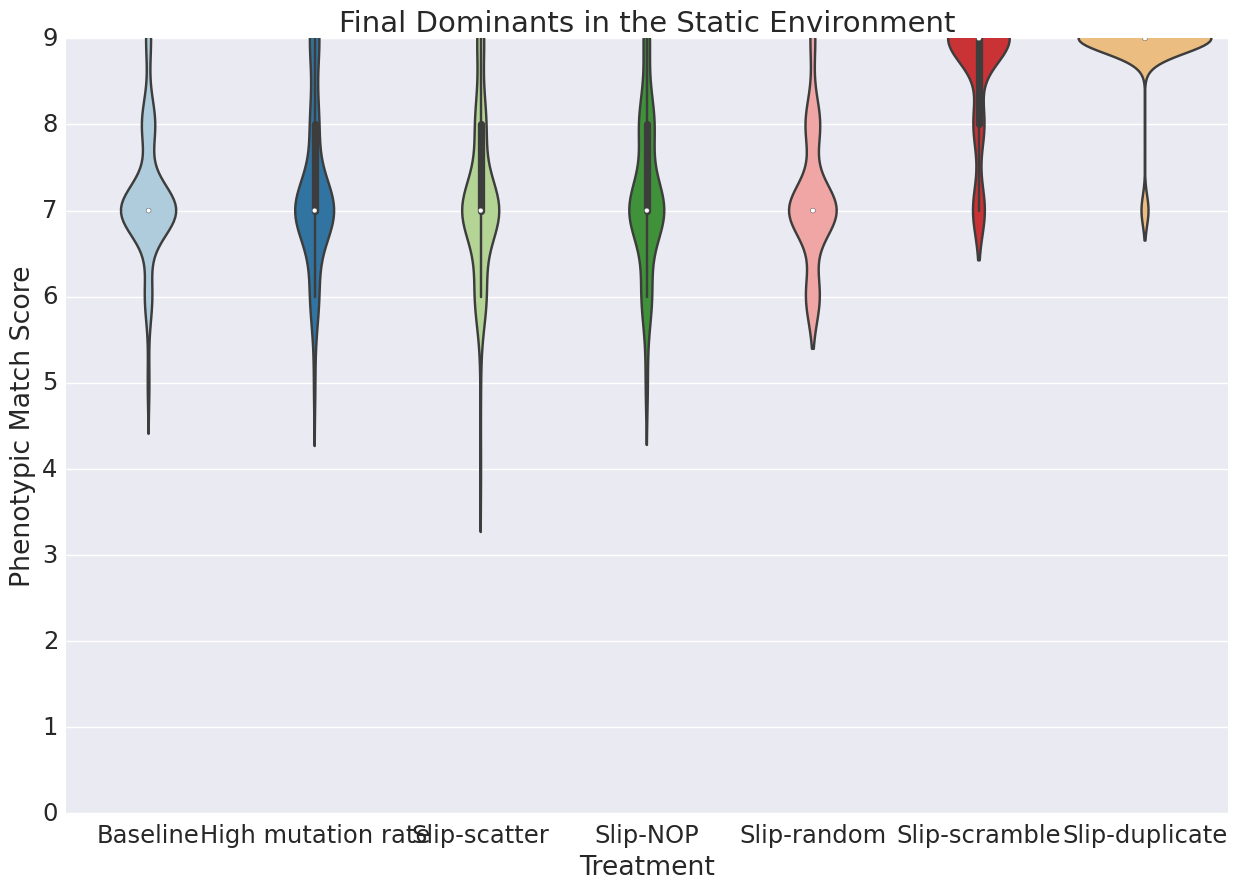

In [43]:
# Visualize non-normalized scores
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ploty = sns.violinplot(x = "fancy_name", y = "fdom_phenotype_score", data = df_mg100[df_mg100["question"] == "Q1"], 
               order = fancy_order, palette =fancy_cmap, orient = "v")
ax.set_ylabel("Phenotypic Match Score")
ax.set_xlabel("Treatment")
ax.set_title("Final Dominants in the Static Environment")
ax.set_ylim(0, 9)
ax.set_yticks([x for x in range(0, 10)])
ploty.get_figure().savefig("static-env_min-gen-100__fdom.png", bbox_inches='tight')

## Static Environment (Min. Genome = 100): Lineage Scores

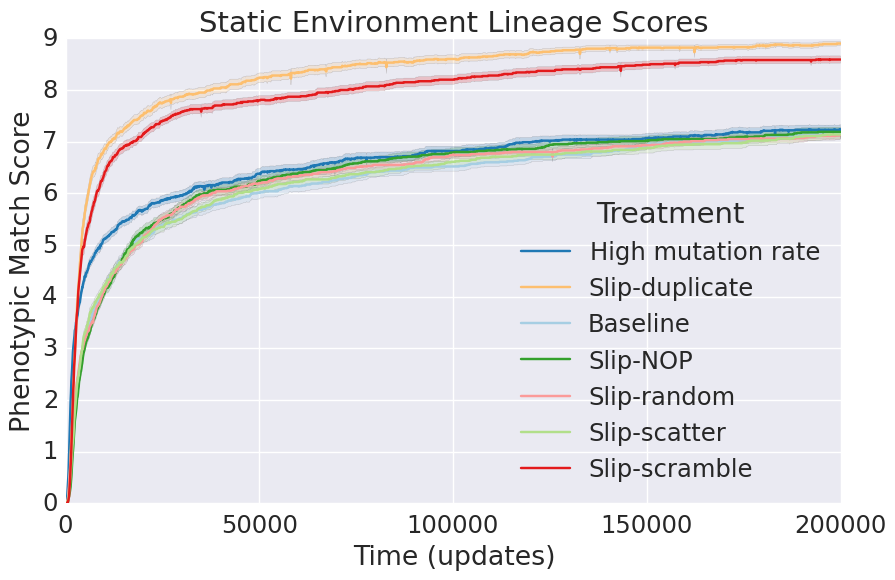

In [40]:
# plot score over time
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ploty = sns.tsplot(data=q1mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap)
ax.set_ylabel("Phenotypic Match Score")
ax.set_xlabel("Time (updates)")
ax.set_title("Static Environment Lineage Scores")
ax.set_ylim(0, 9)
ax.set_xlim(0, 200000)
ax.legend(title= 'Treatment', loc = 'lower right')
ploty.get_figure().savefig("static-env_min-gen-100__lineage.png", bbox_inches='tight')

## Static Environment Combined

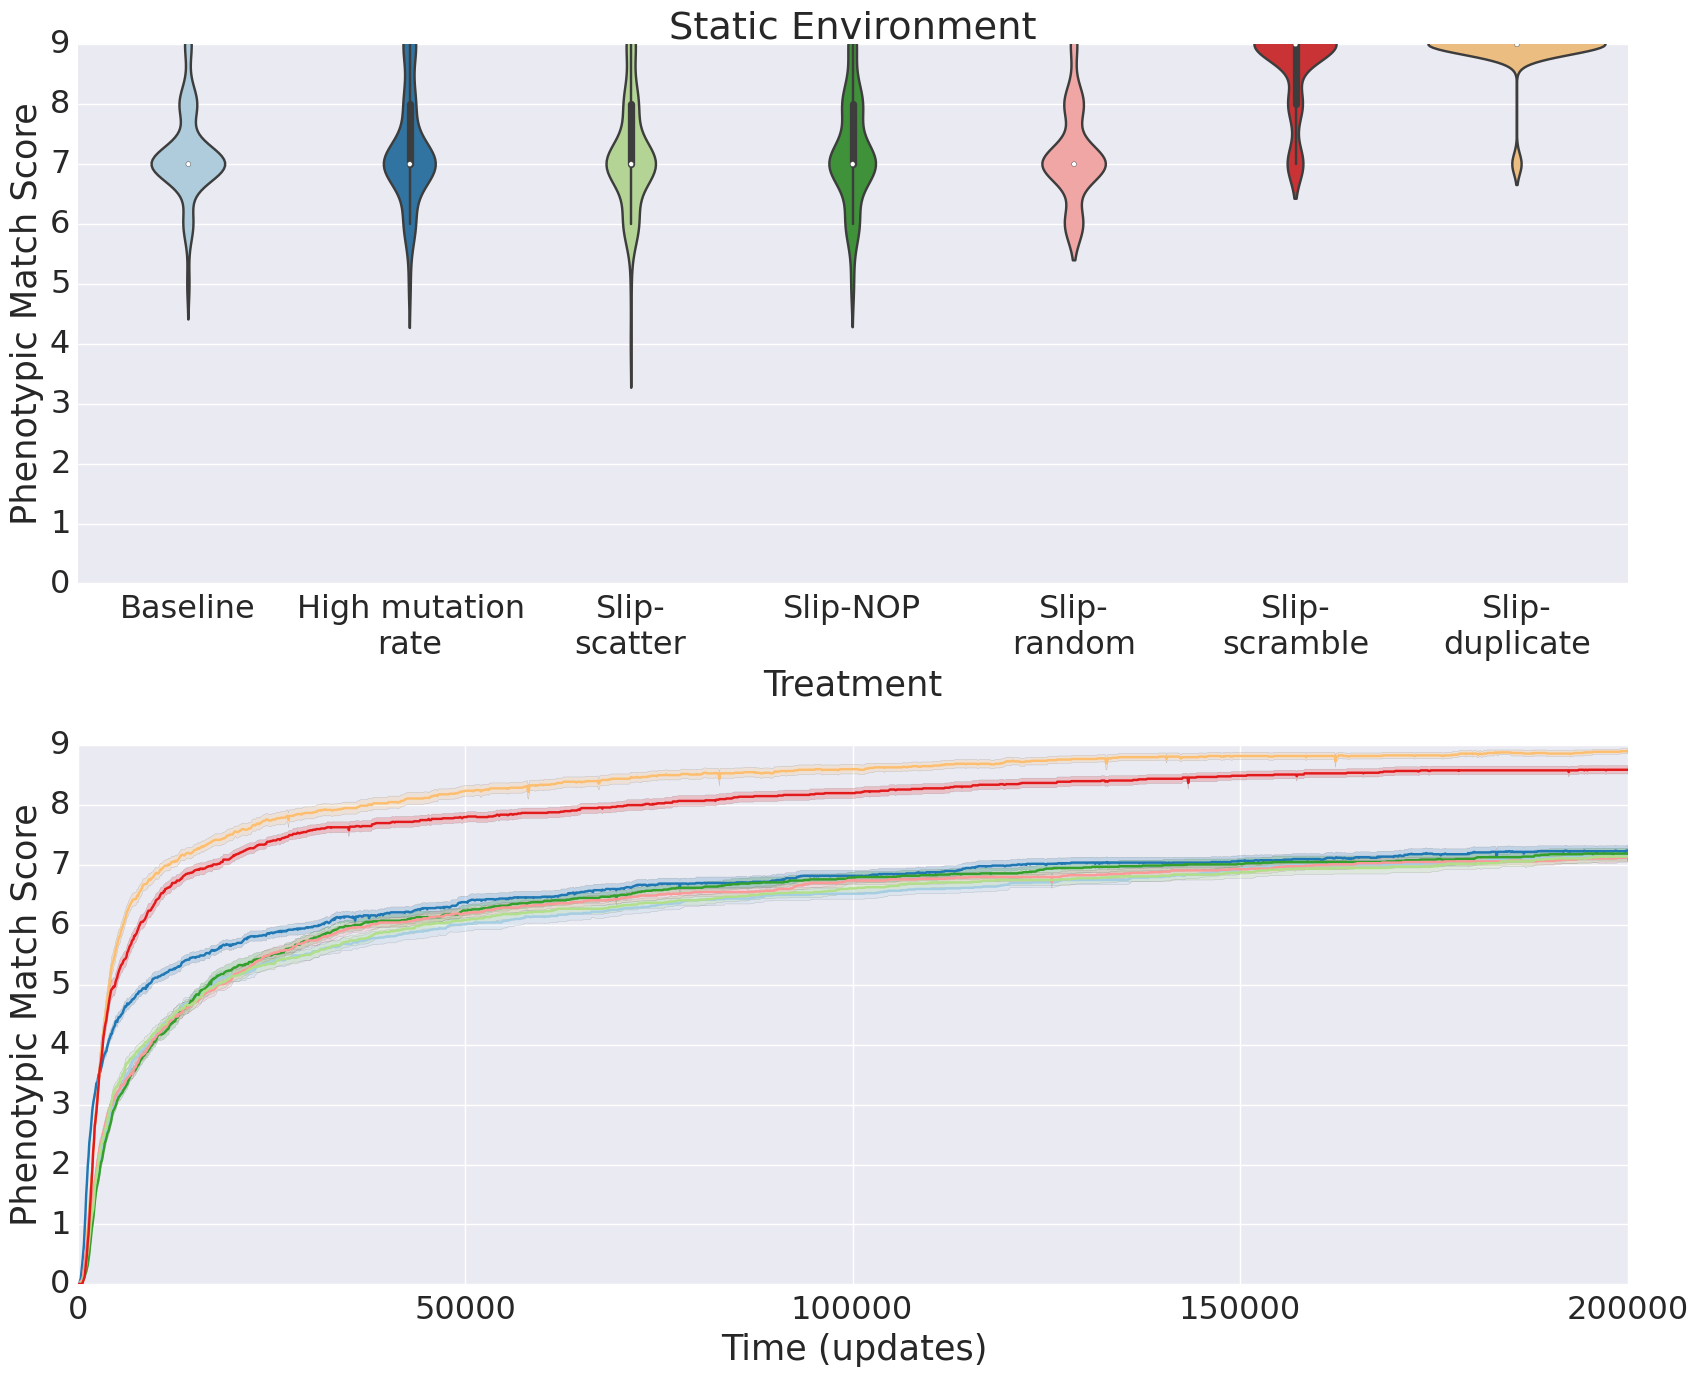

In [81]:
# plot score over time
plt.rc('legend',**{'fontsize':6})
sns.set(font_scale = 2.3)

fig, axarr = plt.subplots(2)
fig.set_size_inches(20, 16)

axarr[0].set_title("Static Environment")


ploty2 = sns.violinplot(x = "fancy_name", y = "fdom_phenotype_score", data = df_mg100[df_mg100["question"] == "Q1"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = axarr[0])
axarr[0].set_ylabel("Phenotypic Match Score")
axarr[0].set_xticklabels(nasty_labels)
axarr[0].set_xlabel("Treatment")
axarr[0].set_ylim(0, 9)

ploty = sns.tsplot(data=q1mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = axarr[1], legend = False)
axarr[1].set_ylabel("Phenotypic Match Score")
axarr[1].set_xlabel("Time (updates)")
axarr[1].set_ylim(0, 9)
axarr[1].set_xlim(0, 200000)
#axarr[1].legend(title= 'Treatment', loc = 'lower right')
#axarr[1].legend_.remove()
fig.subplots_adjust(hspace=.3)
fig.savefig("static-env__min-gen-100.png", bbox_inches='tight')

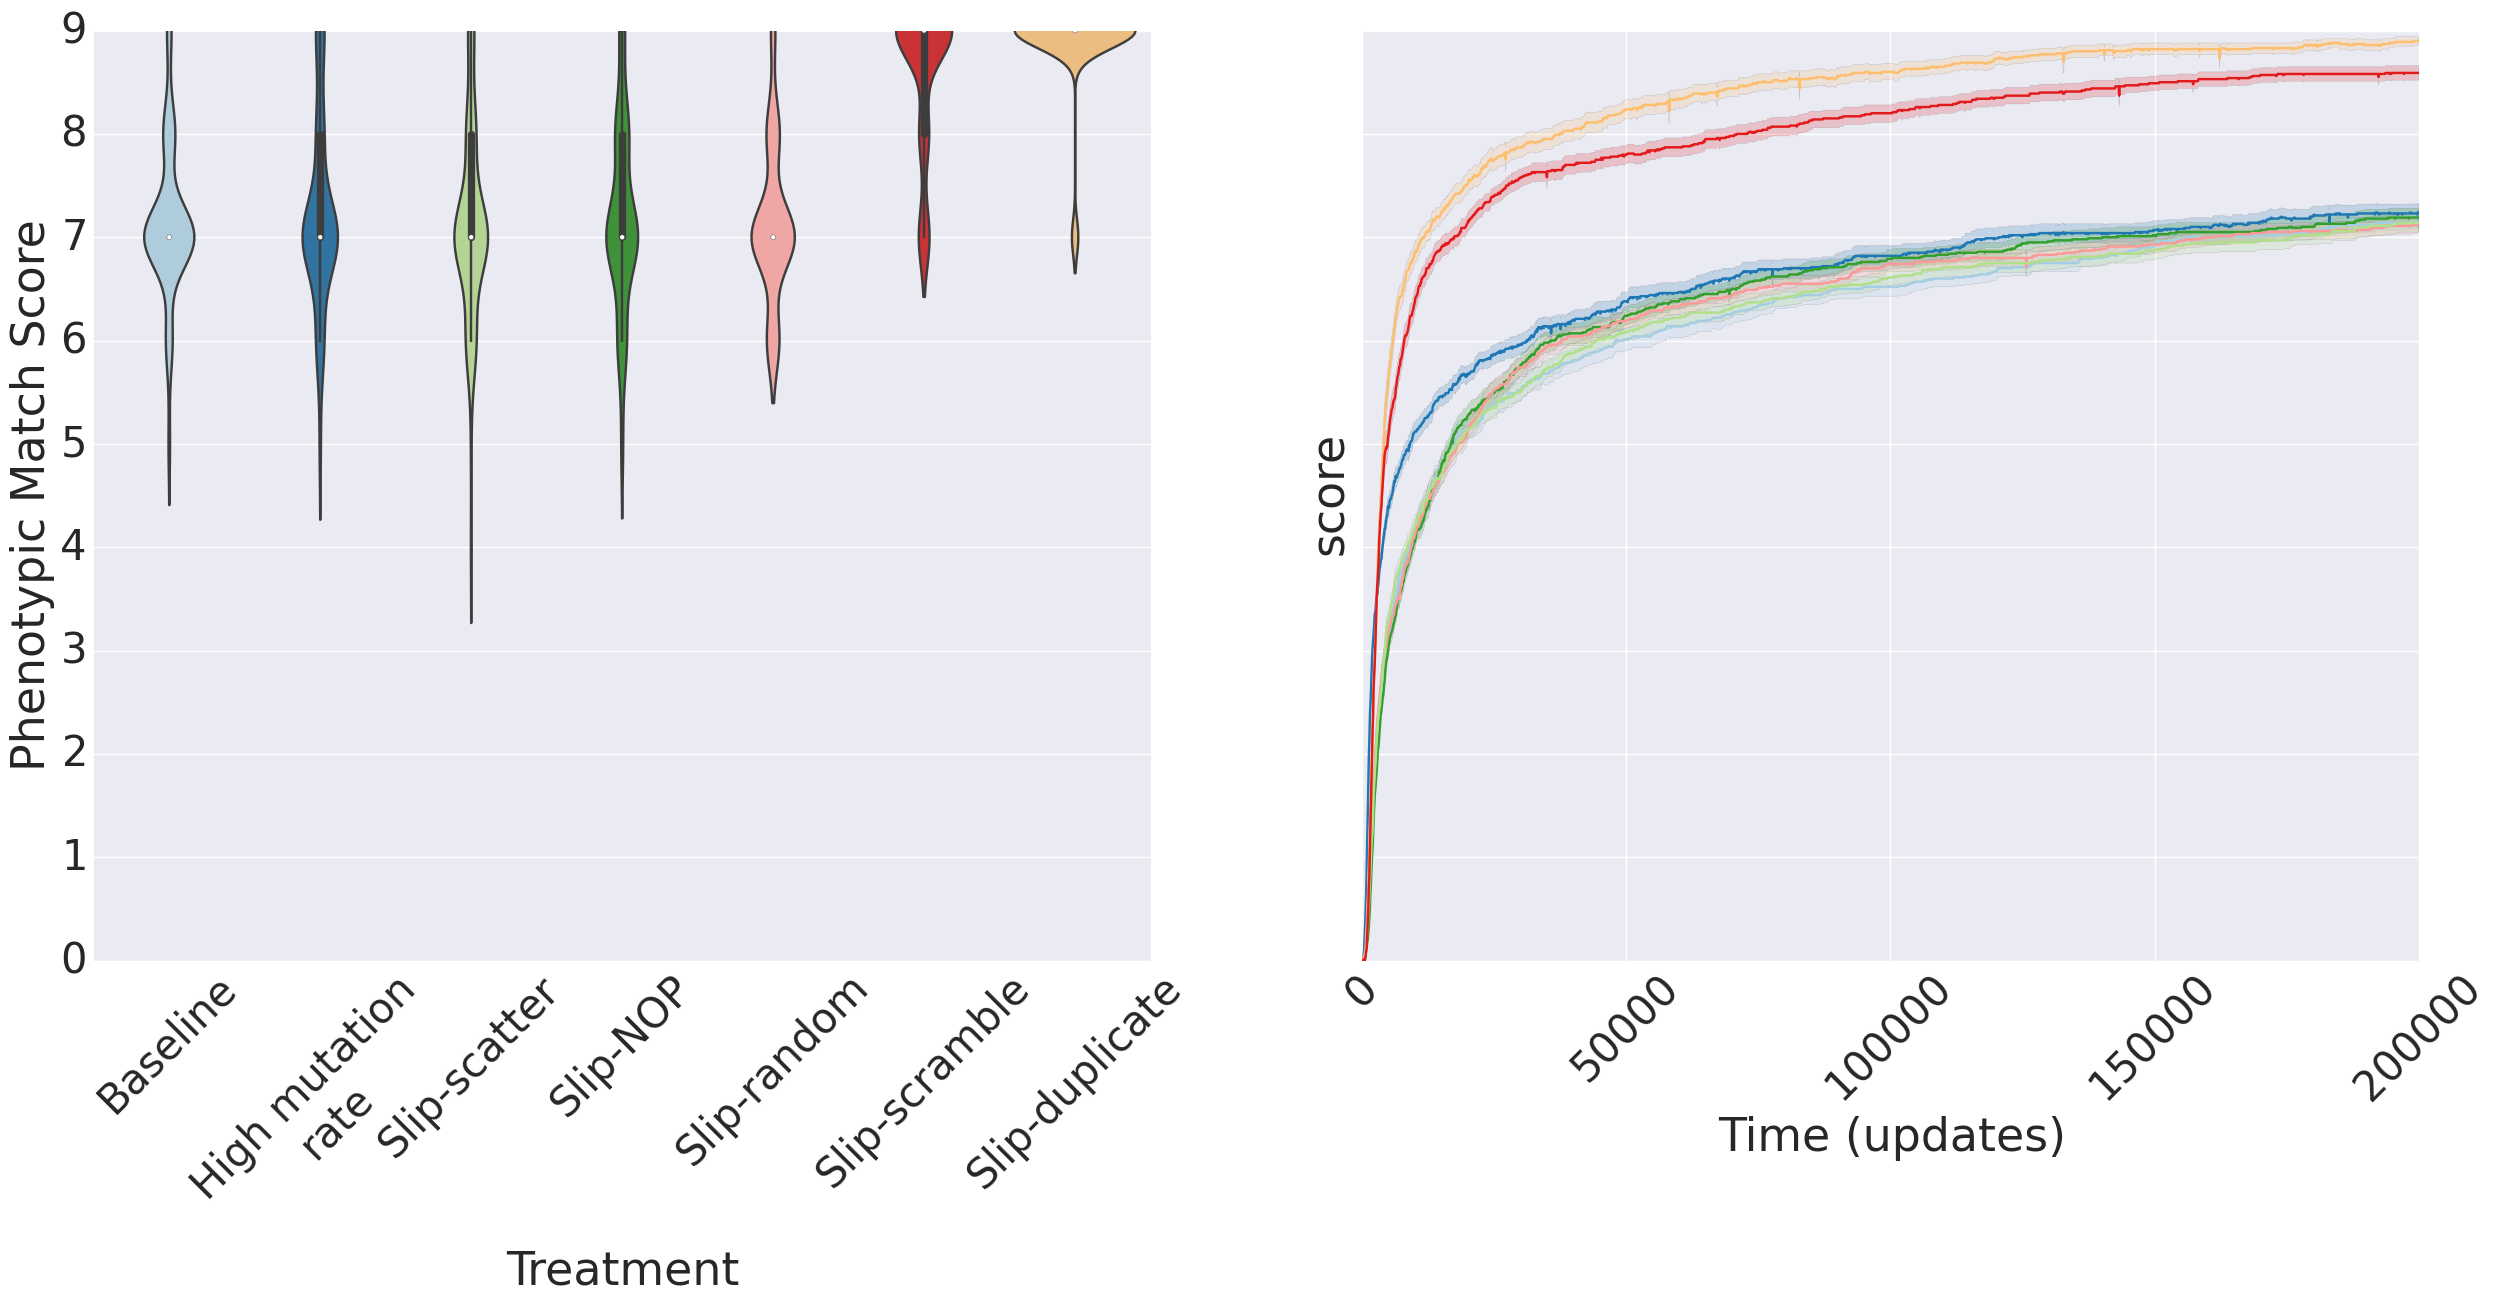

In [119]:
# plot score over time
sns.set(font_scale = 3)

fig, axarr = plt.subplots(1, 2, sharey = True)
fig.set_size_inches(30, 12)

#axarr[0].set_title("Static Environment")


ploty2 = sns.violinplot(x = "fancy_name", y = "fdom_phenotype_score", data = df_mg100[df_mg100["question"] == "Q1"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = axarr[0])
axarr[0].set_ylabel("Phenotypic Match Score")
axarr[0].set_xticklabels(nasty_labels, rotation = 45)
axarr[0].set_xlabel("Treatment")
axarr[0].set_ylim(0, 9)

ploty = sns.tsplot(data=q1mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = axarr[1], legend = False)
axarr[1].set_xlabel("Time (updates)")
axarr[1].set_ylim(0, 9)
axarr[1].set_xlim(0, 200000)
axarr[1].set_xticklabels([i for i in range(0, 200001, 50000)], rotation = 45)
fig.subplots_adjust(hspace=.3)
fig.savefig("static-env__min-gen-100_horizontal.png", bbox_inches='tight')

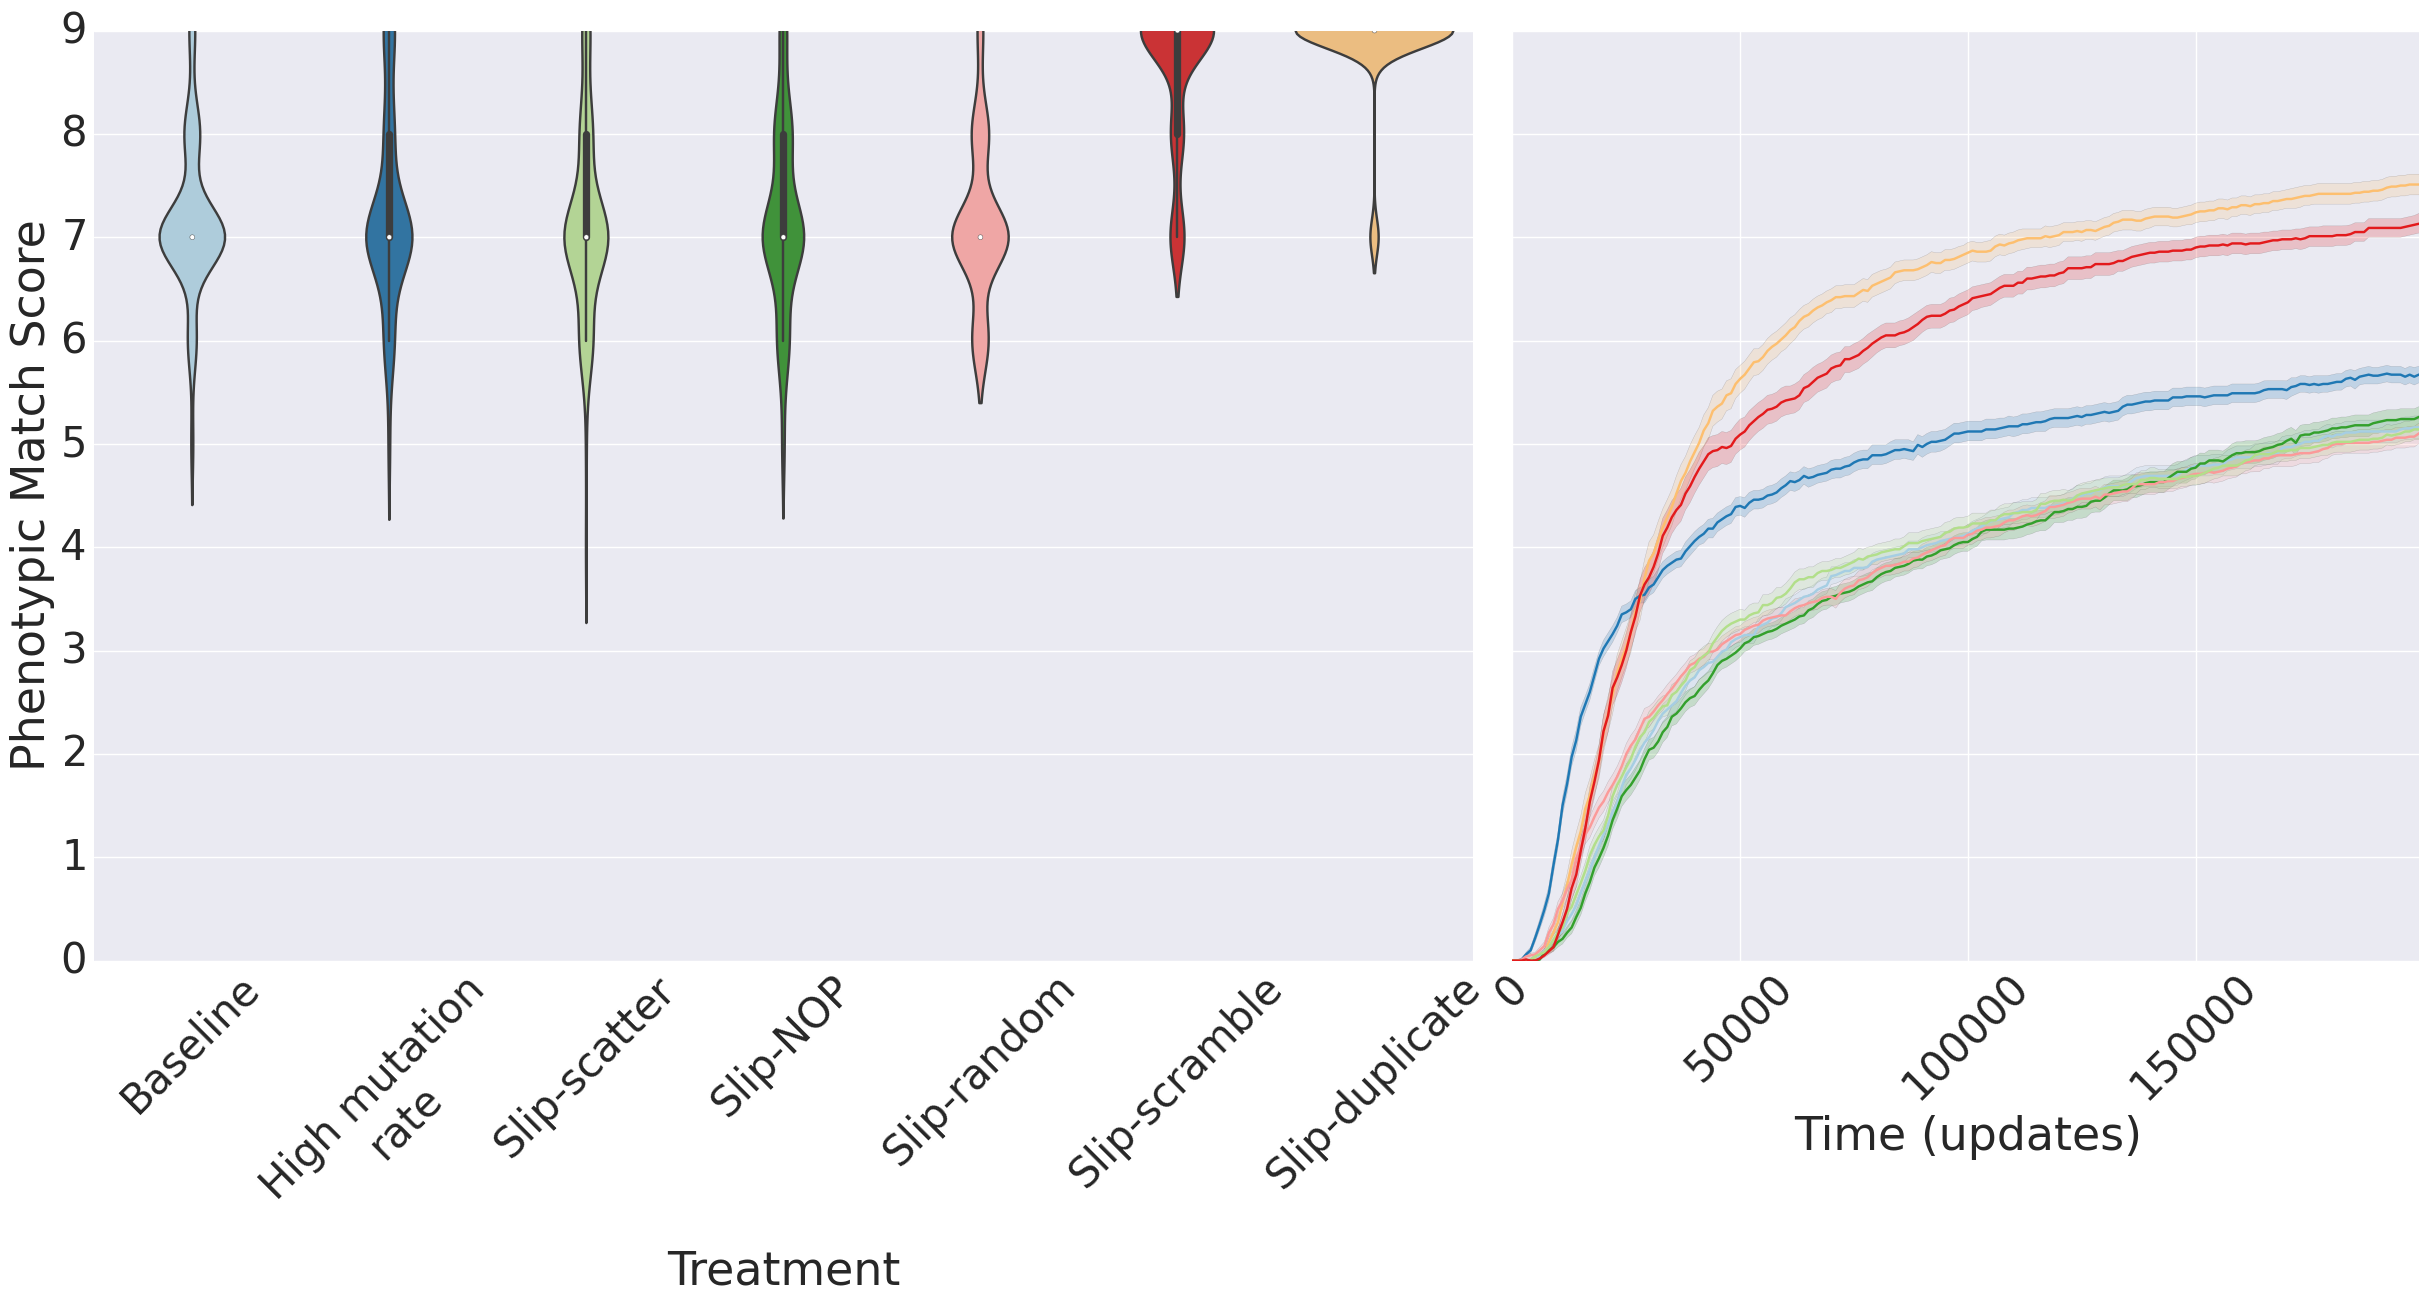

In [138]:
# plot score over time
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(30, 12)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.violinplot(x = "fancy_name", y = "fdom_phenotype_score", data = df_mg100[df_mg100["question"] == "Q1"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = ax0)
ax0.set_ylabel("Phenotypic Match Score")
ax0.set_xticklabels(nasty_labels, rotation = 45)
ax0.set_xlabel("Treatment")
ax0.set_ylim(0, 9)

ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=q1mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = ax1, legend = False)
ax1.set_xlabel("Time (updates)")
ax1.set_xlim(0, 19900)
ax1.set_xticklabels([i for i in range(0, 199001, 50000)], rotation = 45)
ax1.set_ylabel("")
ax1.set_ylim(0, 9)
plt.setp(ax1.get_yticklabels(), visible = False)
fig.subplots_adjust(hspace=.3)
fig.savefig("static-env__min-gen-100_horizontal.png", bbox_inches='tight')

## Simple Changing Environment (Min Genome = 100): Final Dominant

(0, 65)

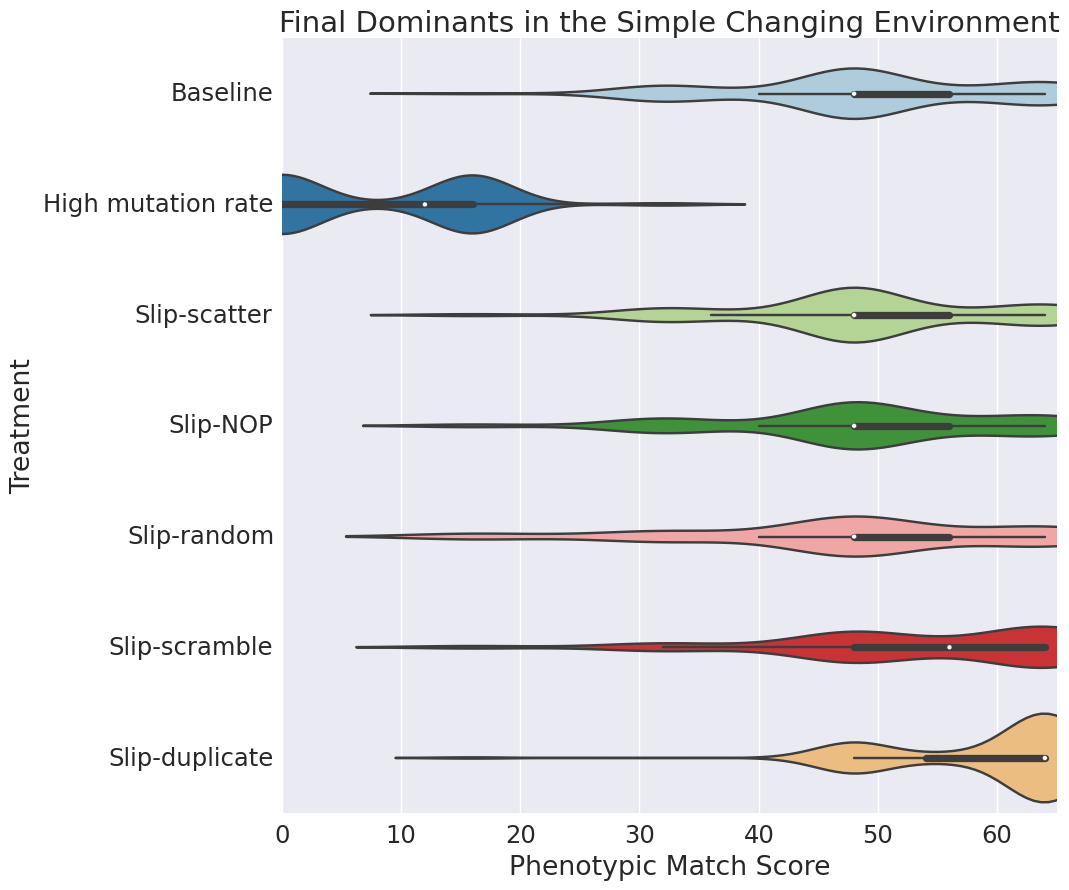

In [28]:
# Visualize non-normalized scores
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.violinplot(y = "fancy_name", x = "-1000_phenotype_score", data = df_mg100[df_mg100["question"] == "Q2"], 
               order = fancy_order, palette =fancy_cmap, orient = "h")
ax.set_xlabel("Phenotypic Match Score")
ax.set_ylabel("Treatment")
ax.set_title("Final Dominants in the Simple Changing Environment")
ax.set_xlim(0, 65)

## Simple Changing Environment (Min Genome = 100): Lineage Scores

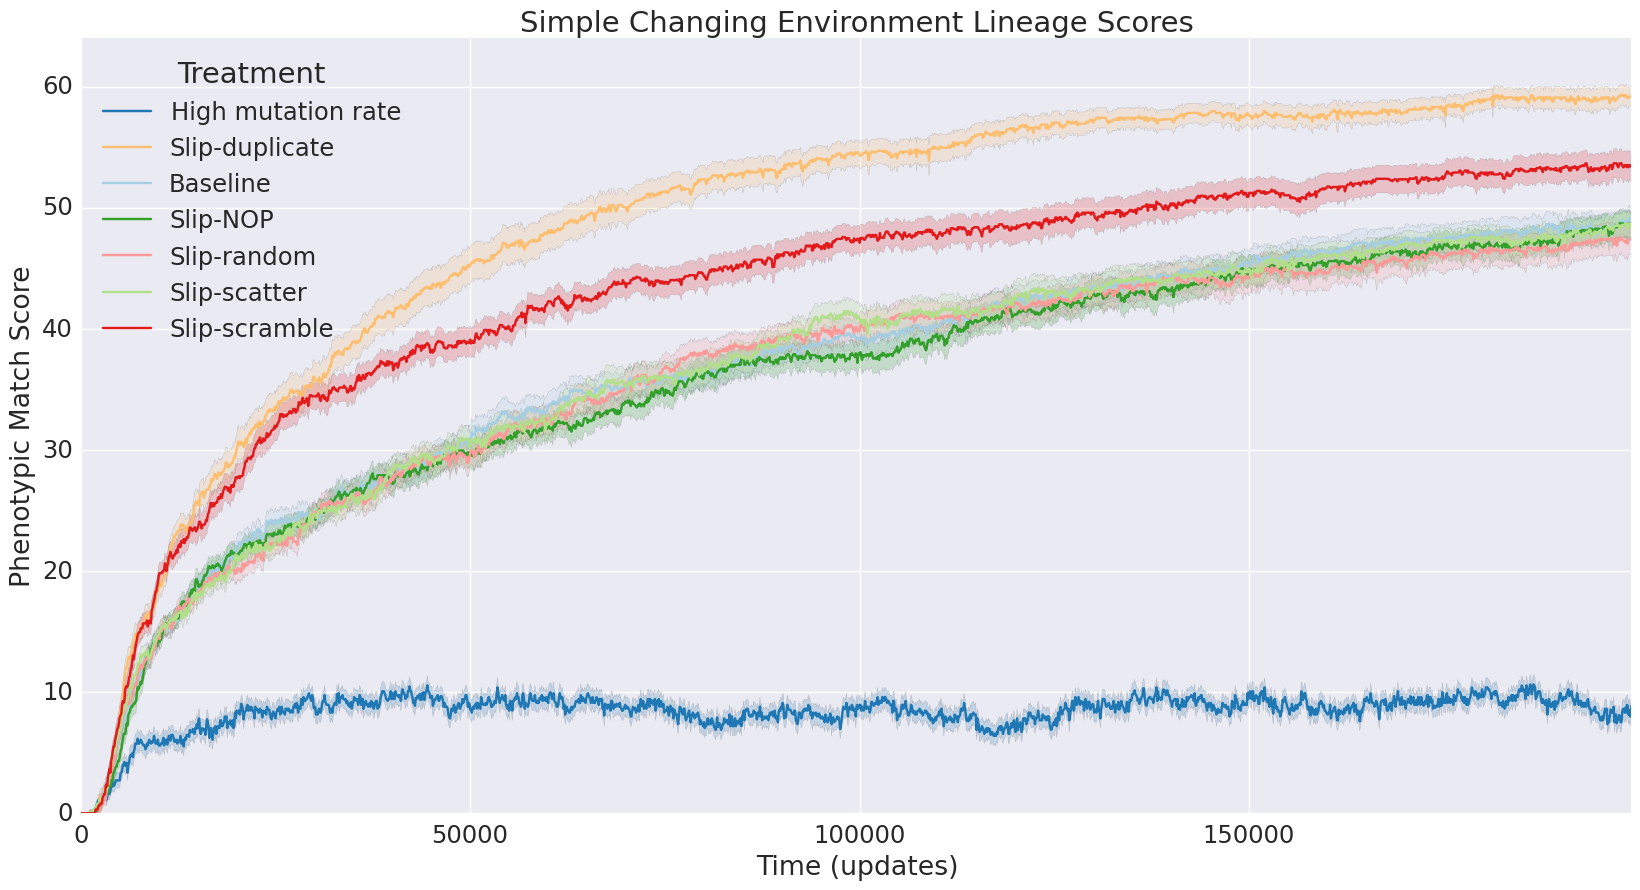

In [29]:
# # Plot score over time
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.tsplot(data=q2mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap)
ax.set_ylim(0, 64)
ax.set_xlim(0, 199000)
ax.set_ylabel("Phenotypic Match Score")
ax.set_xlabel("Time (updates)")
ax.set_title("Simple Changing Environment Lineage Scores")
ax.legend(title= 'Treatment', loc = 'upper left')

## Simple Changing Combined (Min genome = 100)

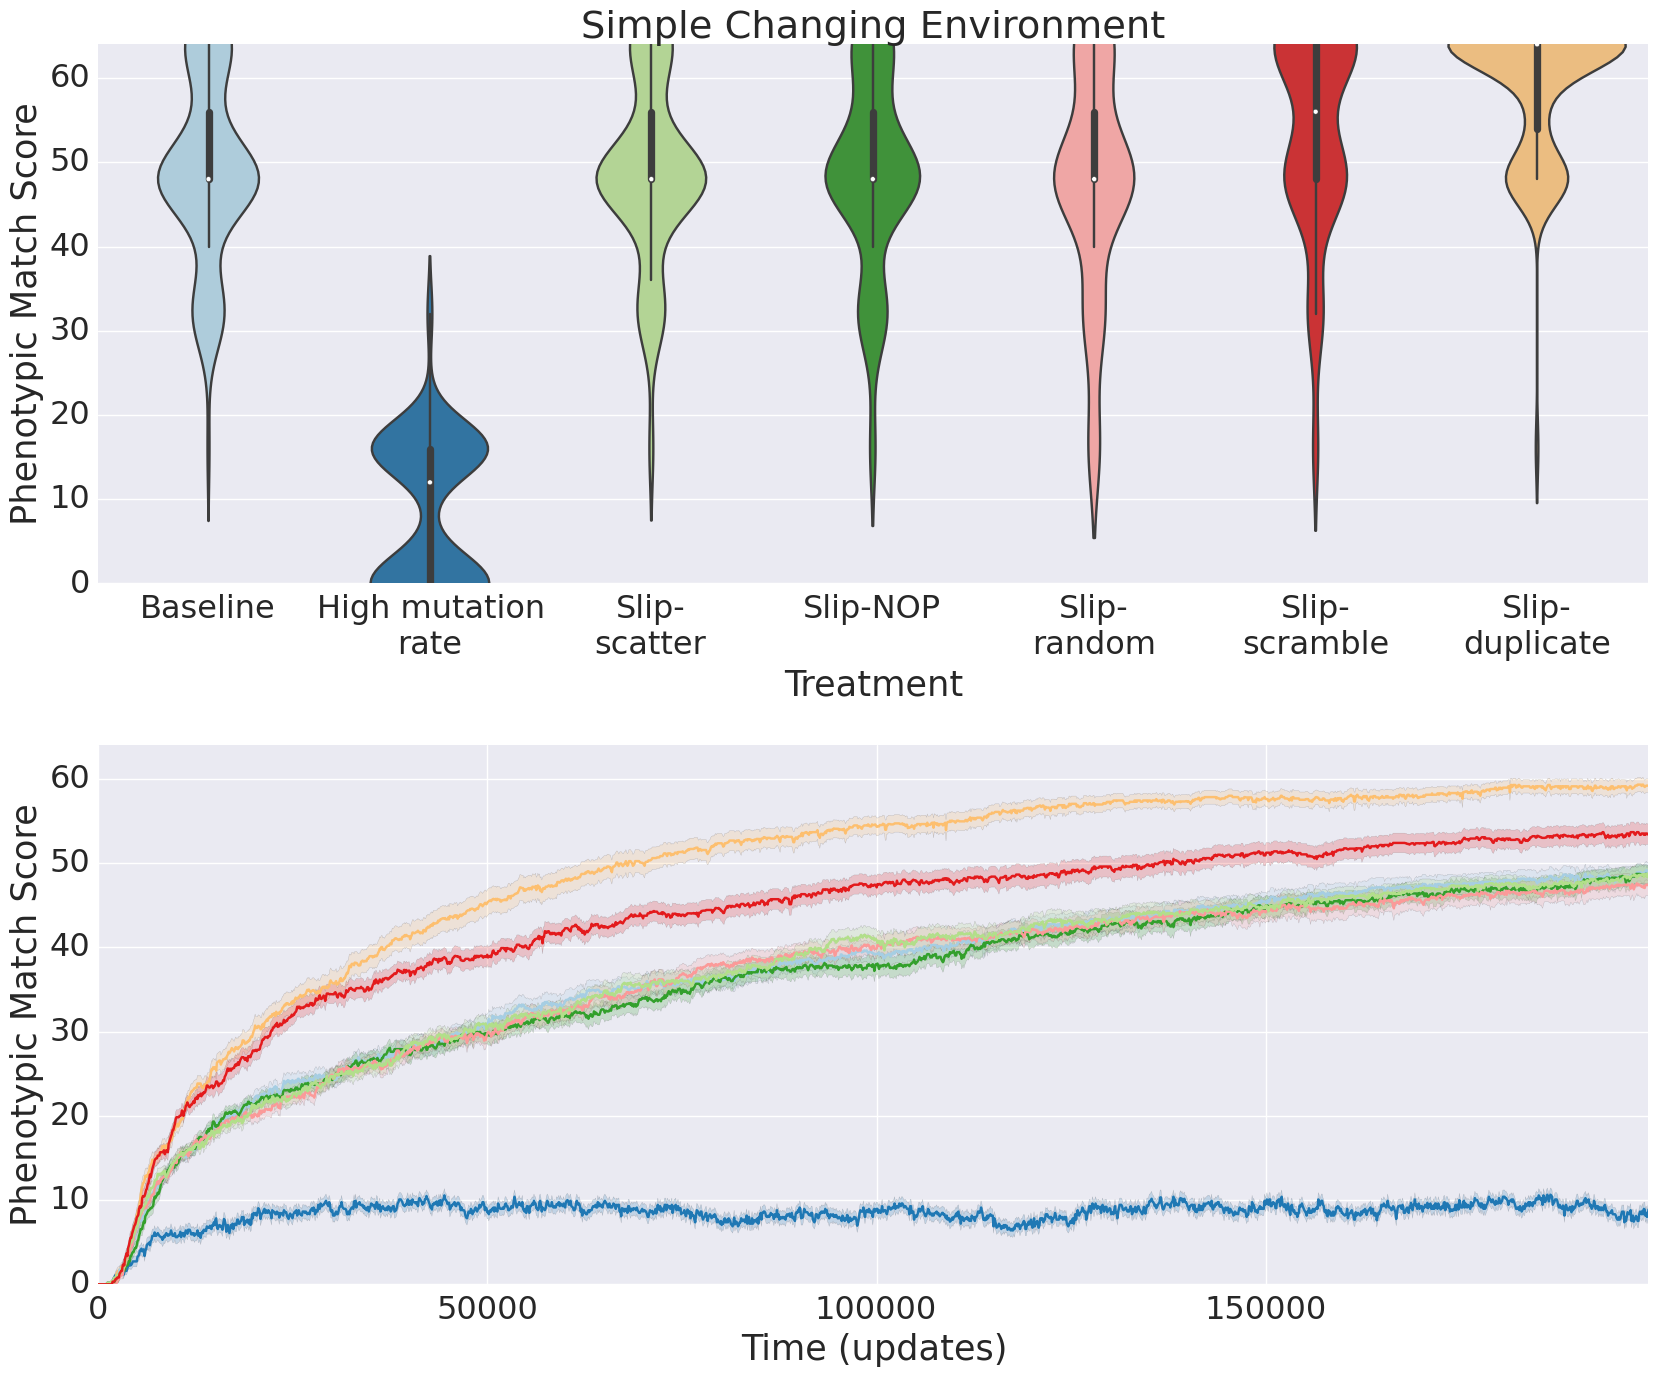

In [88]:
sns.set(font_scale = 2.3)

fig, axarr = plt.subplots(2)
fig.set_size_inches(20, 16)

axarr[0].set_title("Simple Changing Environment")


ploty2 = sns.violinplot(x = "fancy_name", y = "-1000_phenotype_score", data = df_mg100[df_mg100["question"] == "Q2"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = axarr[0])
axarr[0].set_ylabel("Phenotypic Match Score")
axarr[0].set_xticklabels(nasty_labels)
axarr[0].set_xlabel("Treatment")
axarr[0].set_ylim(0, 64)

ploty = sns.tsplot(data=q2mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = axarr[1], legend = False)
axarr[1].set_ylabel("Phenotypic Match Score")
axarr[1].set_xlabel("Time (updates)")
axarr[1].set_ylim(0, 64)
axarr[1].set_xlim(0, 199000)
#axarr[1].legend(title= 'Treatment', loc = 'lower right')

fig.subplots_adjust(hspace=.3)
fig.savefig("simple-changing-env__min-gen-100.png", bbox_inches='tight')

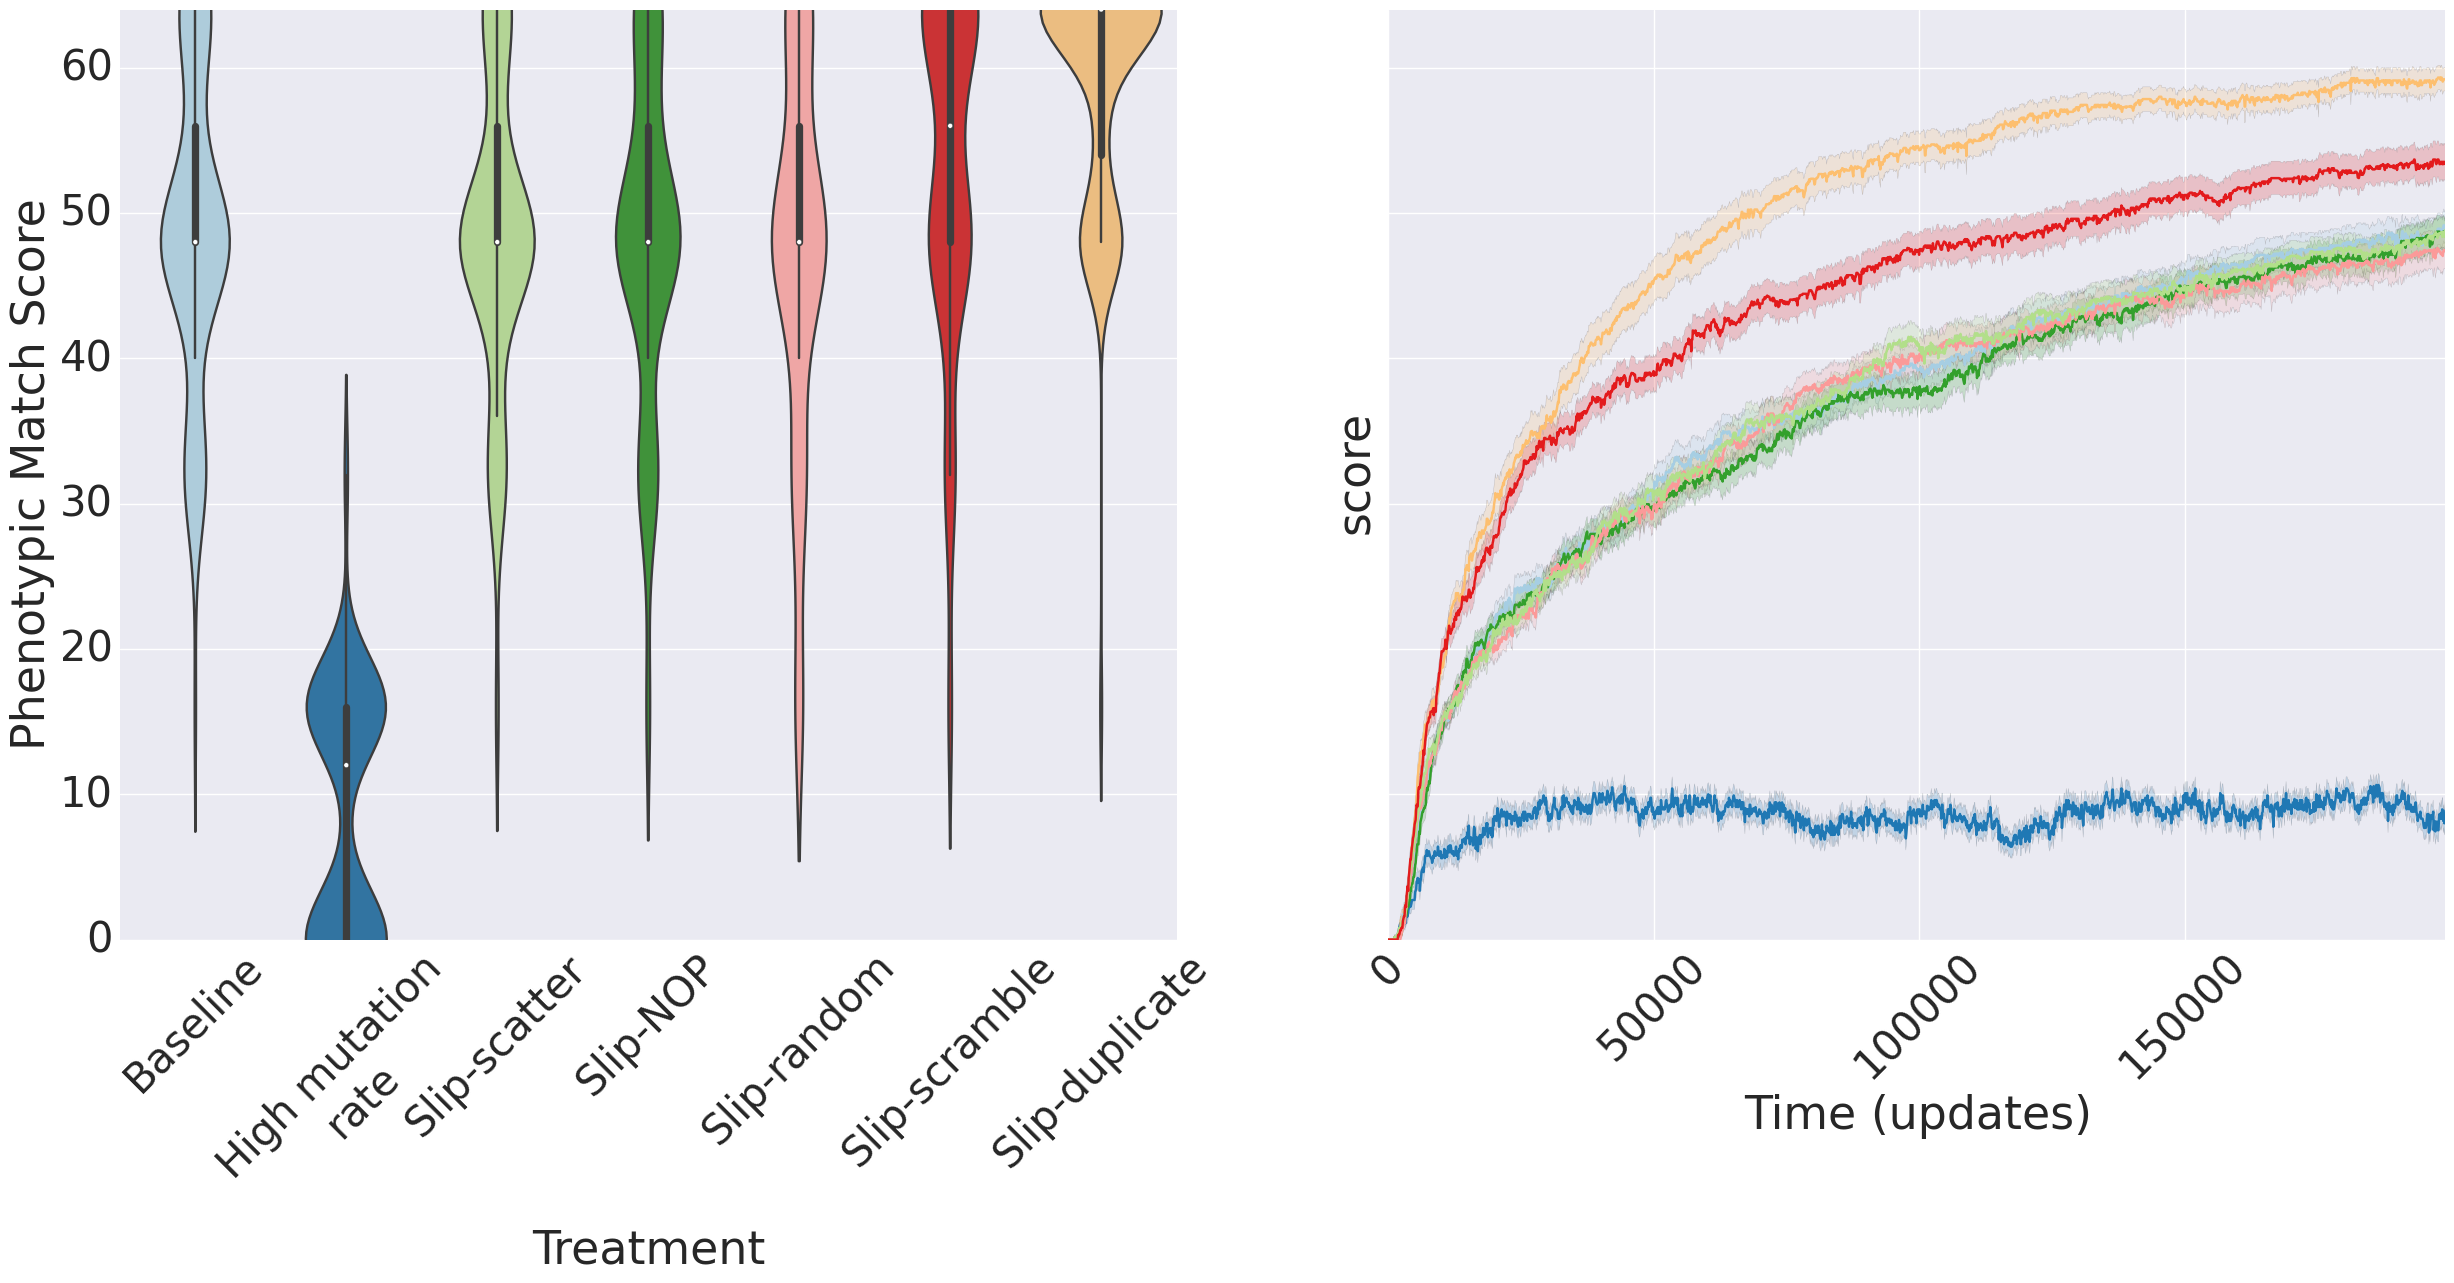

In [126]:
# plot score over time
sns.set(font_scale = 3)

fig, axarr = plt.subplots(1, 2, sharey = True)
fig.set_size_inches(30, 12)

#axarr[0].set_title("Static Environment")


ploty2 = sns.violinplot(x = "fancy_name", y = "-1000_phenotype_score", data = df_mg100[df_mg100["question"] == "Q2"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = axarr[0])
axarr[0].set_ylabel("Phenotypic Match Score")
axarr[0].set_xticklabels(nasty_labels, rotation = 45)
axarr[0].set_xlabel("Treatment")
axarr[0].set_ylim(0, 64)

ploty = sns.tsplot(data=q2mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = axarr[1], legend = False)
axarr[1].set_xlabel("Time (updates)")
axarr[1].set_ylim(0, 64)
axarr[1].set_xlim(0, 199000)
axarr[1].set_xticklabels([i for i in range(0, 199000, 50000)], rotation = 45)
fig.subplots_adjust(hspace=.3)
fig.savefig("simple-changing-env__min-gen-100_horizontal.png", bbox_inches='tight')

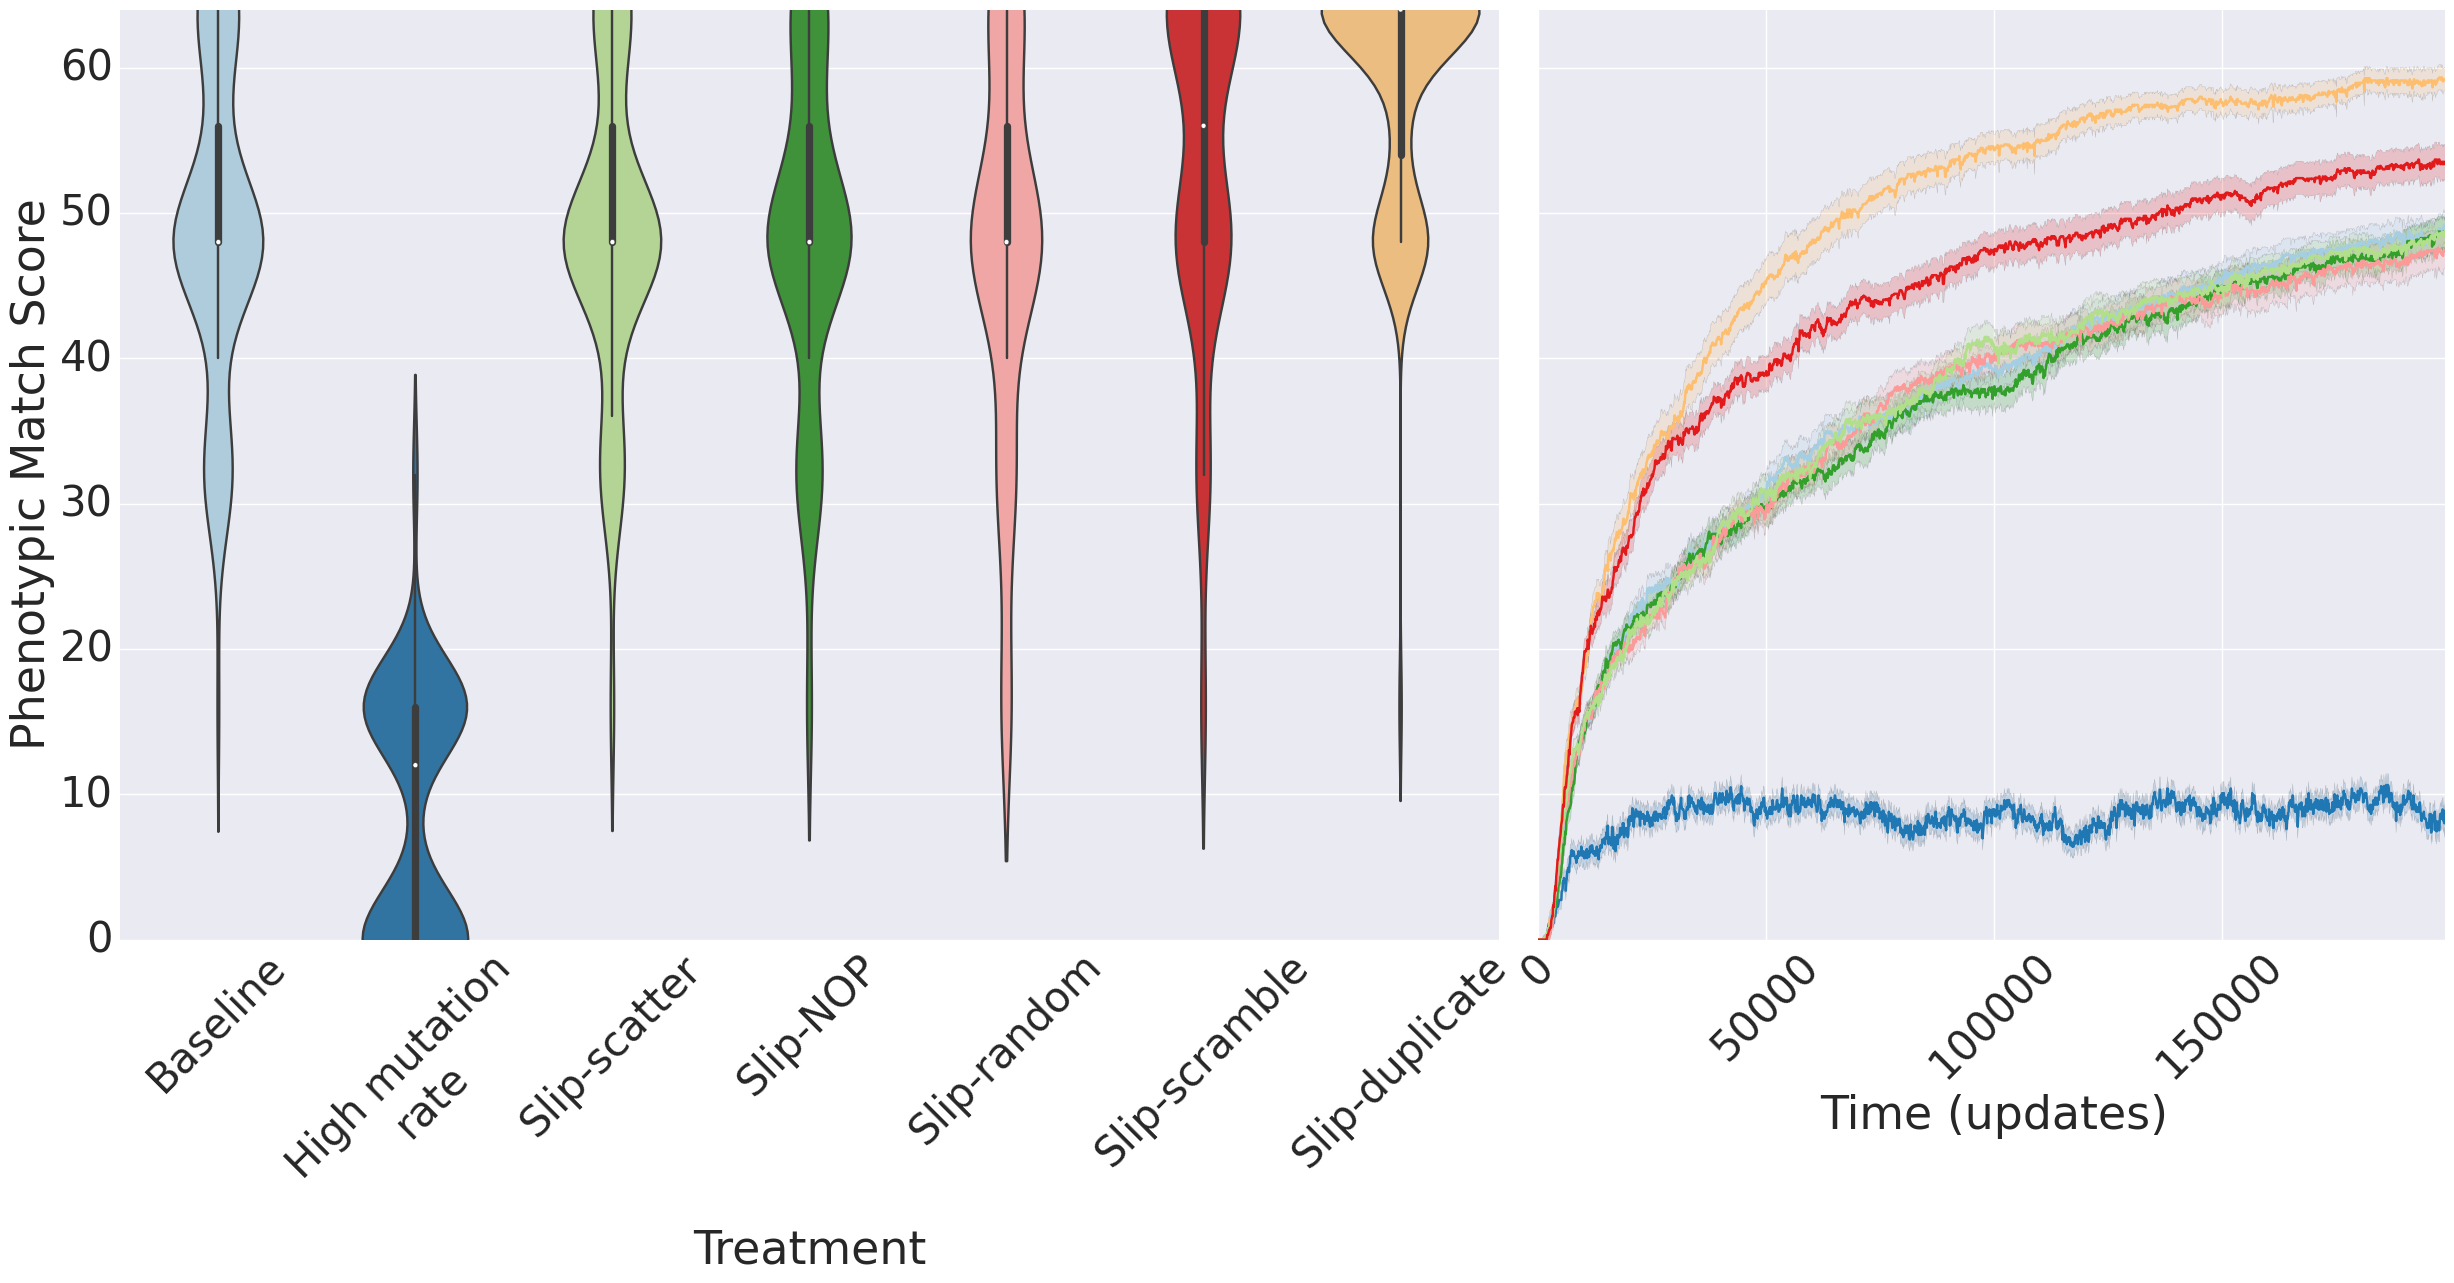

In [136]:
# plot score over time
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(30, 12)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.violinplot(x = "fancy_name", y = "-1000_phenotype_score", data = df_mg100[df_mg100["question"] == "Q2"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = ax0)
ax0.set_ylabel("Phenotypic Match Score")
ax0.set_xticklabels(nasty_labels, rotation = 45)
ax0.set_xlabel("Treatment")
ax0.set_ylim(0, 64)

ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=q2mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = ax1, legend = False)
ax1.set_xlabel("Time (updates)")
ax1.set_ylim(0, 64)
ax1.set_xlim(0, 199000)
ax1.set_xticklabels([i for i in range(0, 199000, 50000)], rotation = 45)
ax1.set_ylabel("")
plt.setp(ax1.get_yticklabels(), visible = False)
fig.subplots_adjust(hspace=.3)
fig.savefig("simple-changing-env__min-gen-100_horizontal.png", bbox_inches='tight')

## Complex Changing Environment (Min Genome = 100): Final Dominants

(0, 4608)

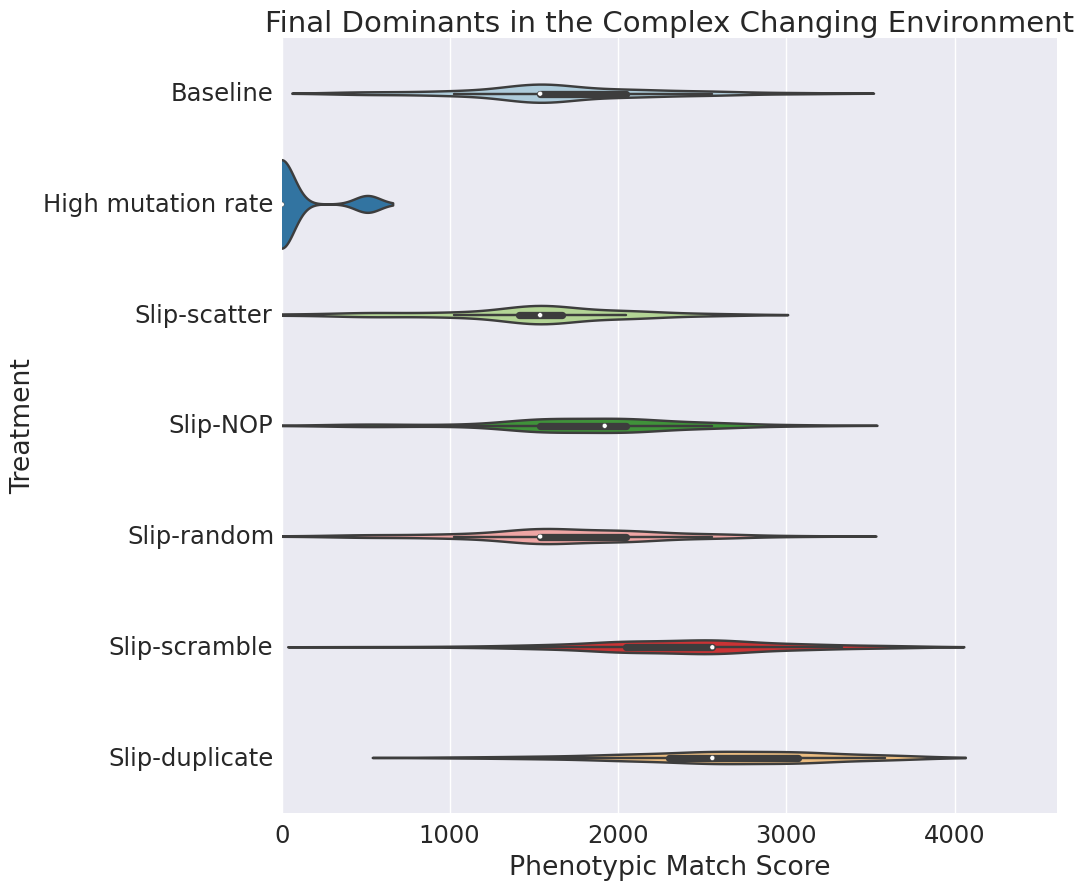

In [30]:
# Visualize non-normalized scores
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.violinplot(y = "fancy_name", x = "-1000_phenotype_score", data = df_mg100[df_mg100["question"] == "Q3"], 
               order = fancy_order, palette =fancy_cmap, orient = "h")
ax.set_xlabel("Phenotypic Match Score")
ax.set_ylabel("Treatment")
ax.set_title("Final Dominants in the Complex Changing Environment")
ax.set_xlim(0, 4608)

## Complex Changing Environment (Min Genome = 100): Lineage Scores

(0, 399000)

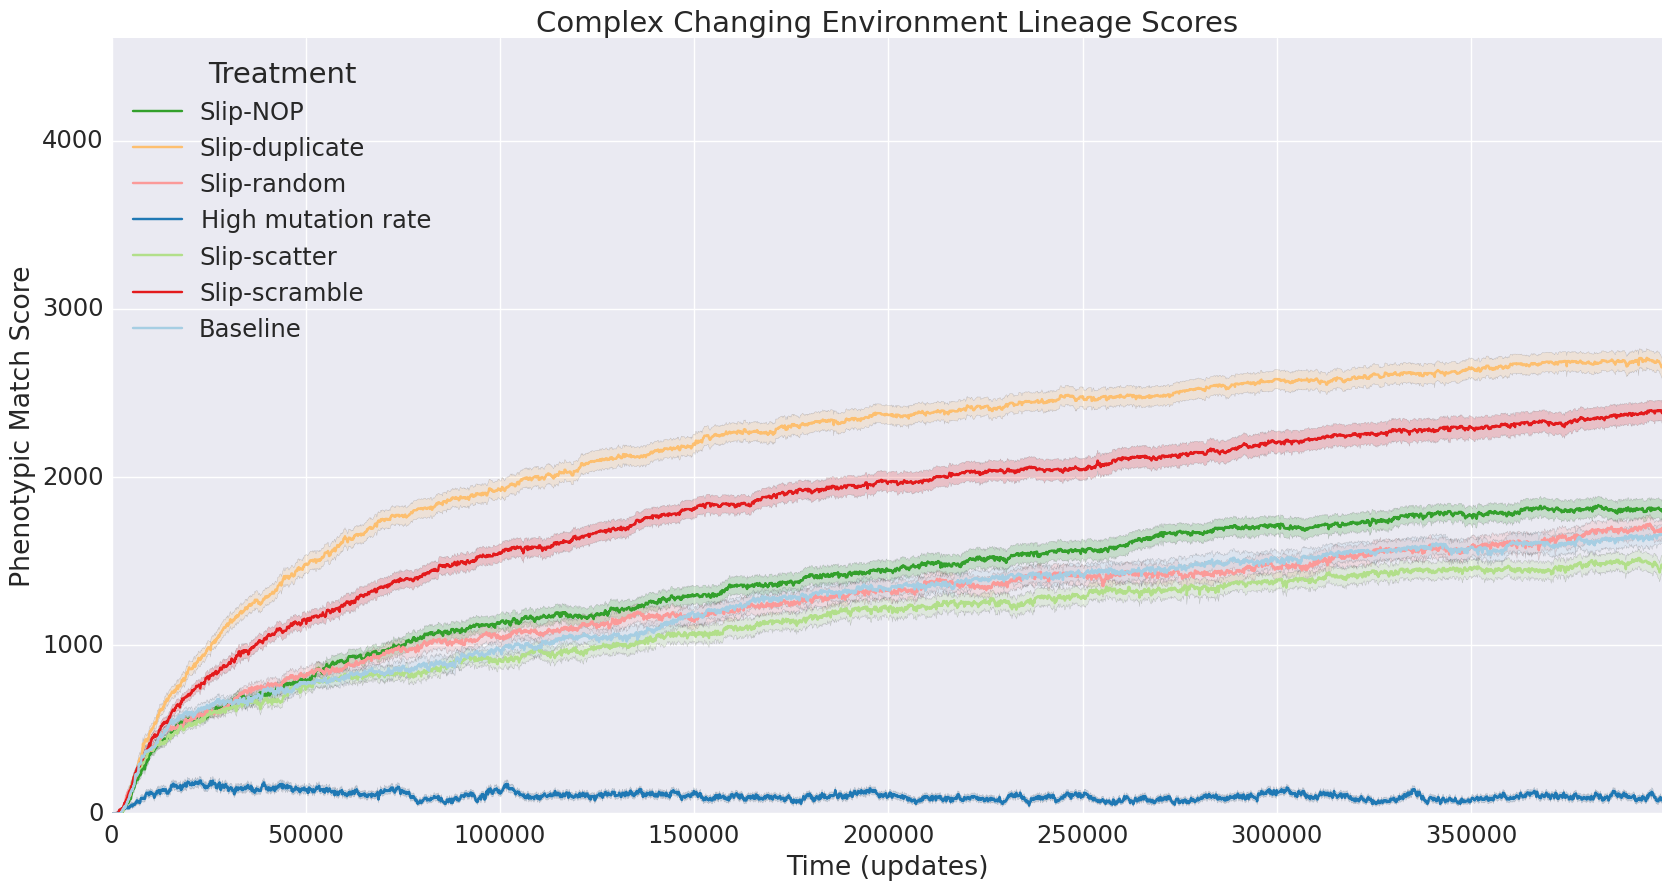

In [31]:
# Plot score over time
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.tsplot(data=q3mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap)
ax.set_ylabel("Score")
ax.set_xlabel("Time (updates)")
ax.set_title("Complex Changing Environment Lineage Scores")
ax.set_ylabel("Phenotypic Match Score")
ax.legend(title= 'Treatment', loc = 'upper left')
ax.set_ylim(0, 4608)
ax.set_xlim(0, 399000)

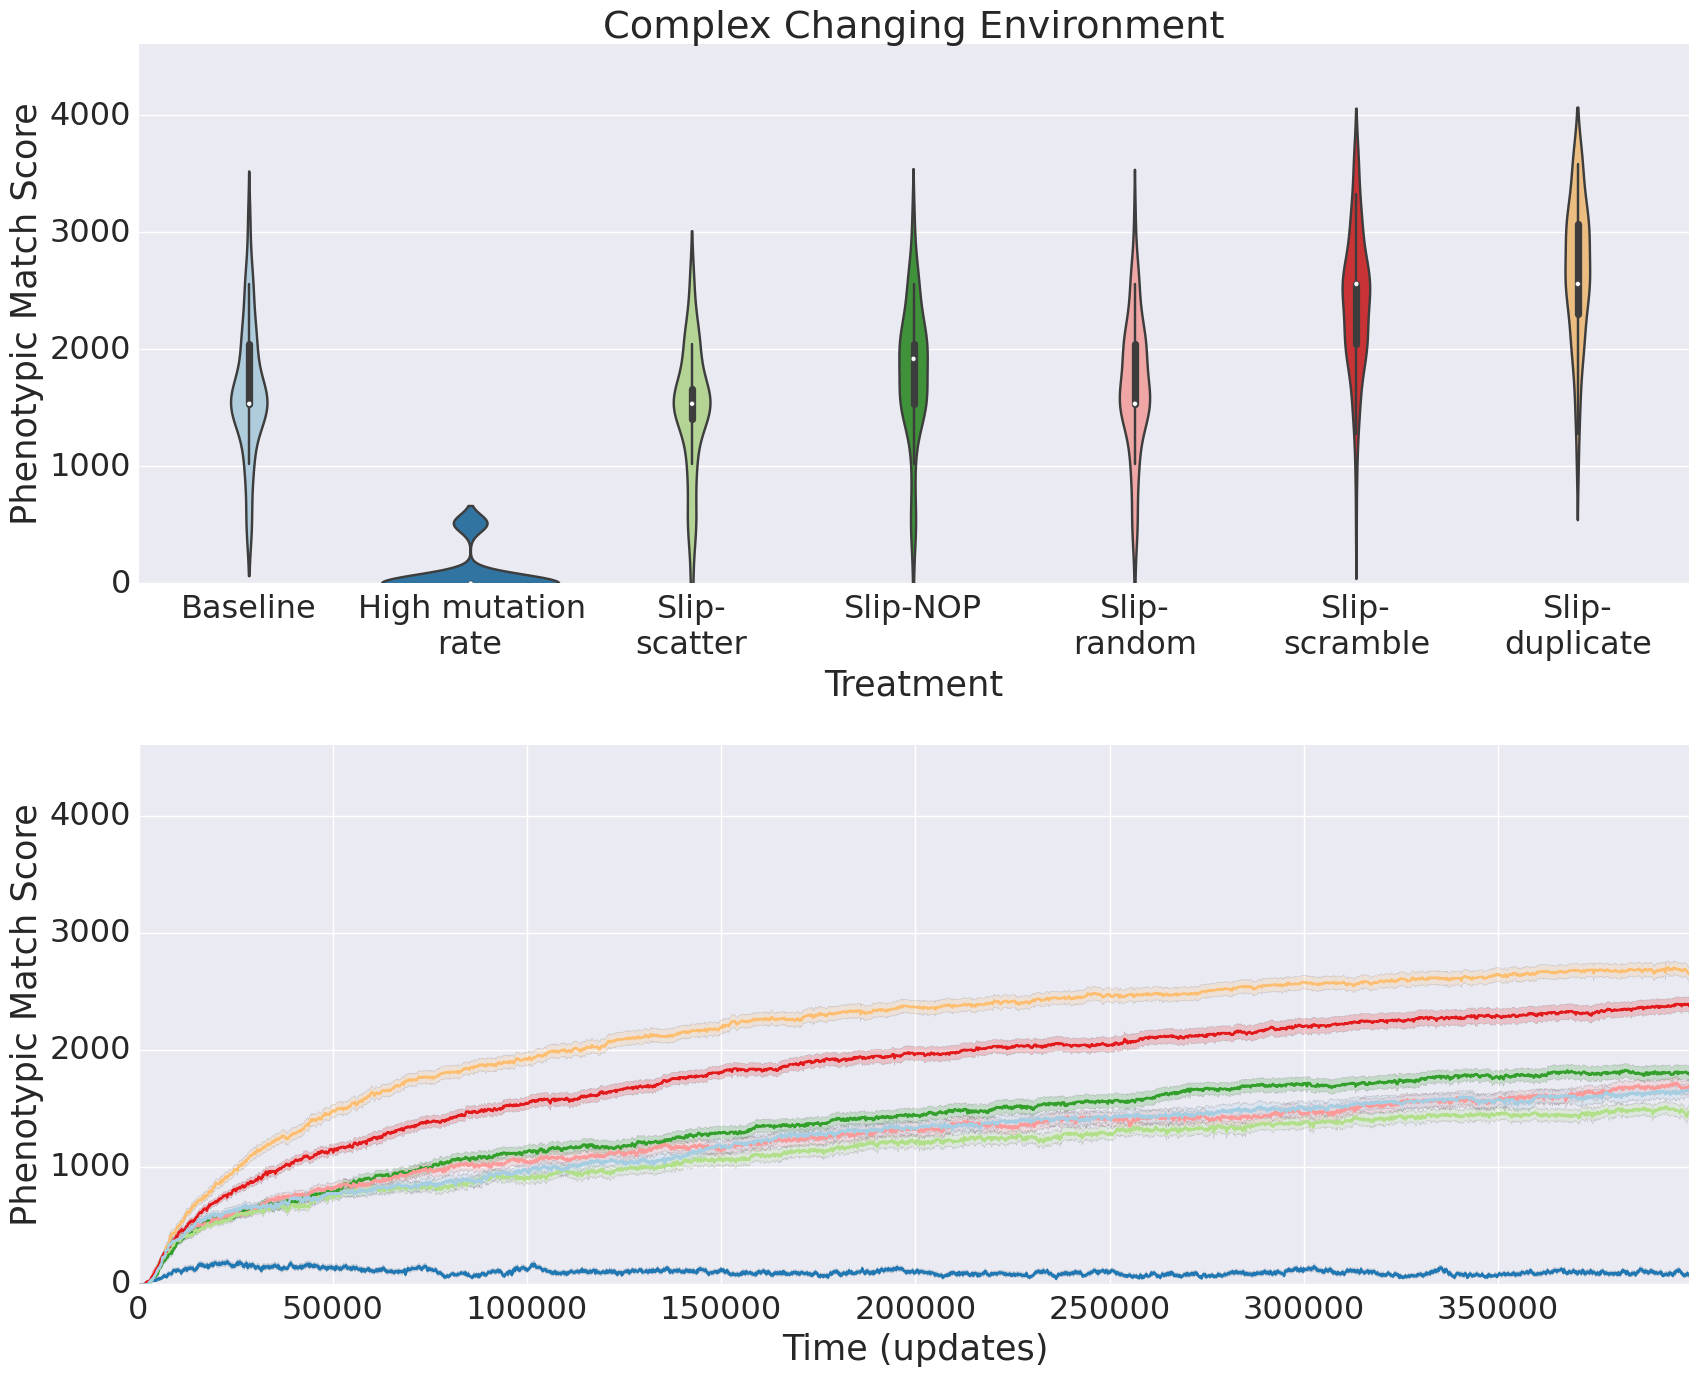

In [87]:
sns.set(font_scale = 2.3)

fig, axarr = plt.subplots(2)
fig.set_size_inches(20, 16)

axarr[0].set_title("Complex Changing Environment")


ploty2 = sns.violinplot(x = "fancy_name", y = "-1000_phenotype_score", data = df_mg100[df_mg100["question"] == "Q3"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = axarr[0])
axarr[0].set_ylabel("Phenotypic Match Score")
axarr[0].set_xticklabels(nasty_labels)
axarr[0].set_xlabel("Treatment")
axarr[0].set_ylim(0, 4608)

ploty = sns.tsplot(data=q3mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = axarr[1], legend = False)
axarr[1].set_ylabel("Phenotypic Match Score")
axarr[1].set_xlabel("Time (updates)")
axarr[1].set_ylim(0, 4608)
axarr[1].set_xlim(0, 399000)
#axarr[1].legend(title= 'Treatment', loc = 'lower right')

fig.subplots_adjust(hspace=.3)
fig.savefig("complex-changing-env__min-gen-100.png", bbox_inches='tight')

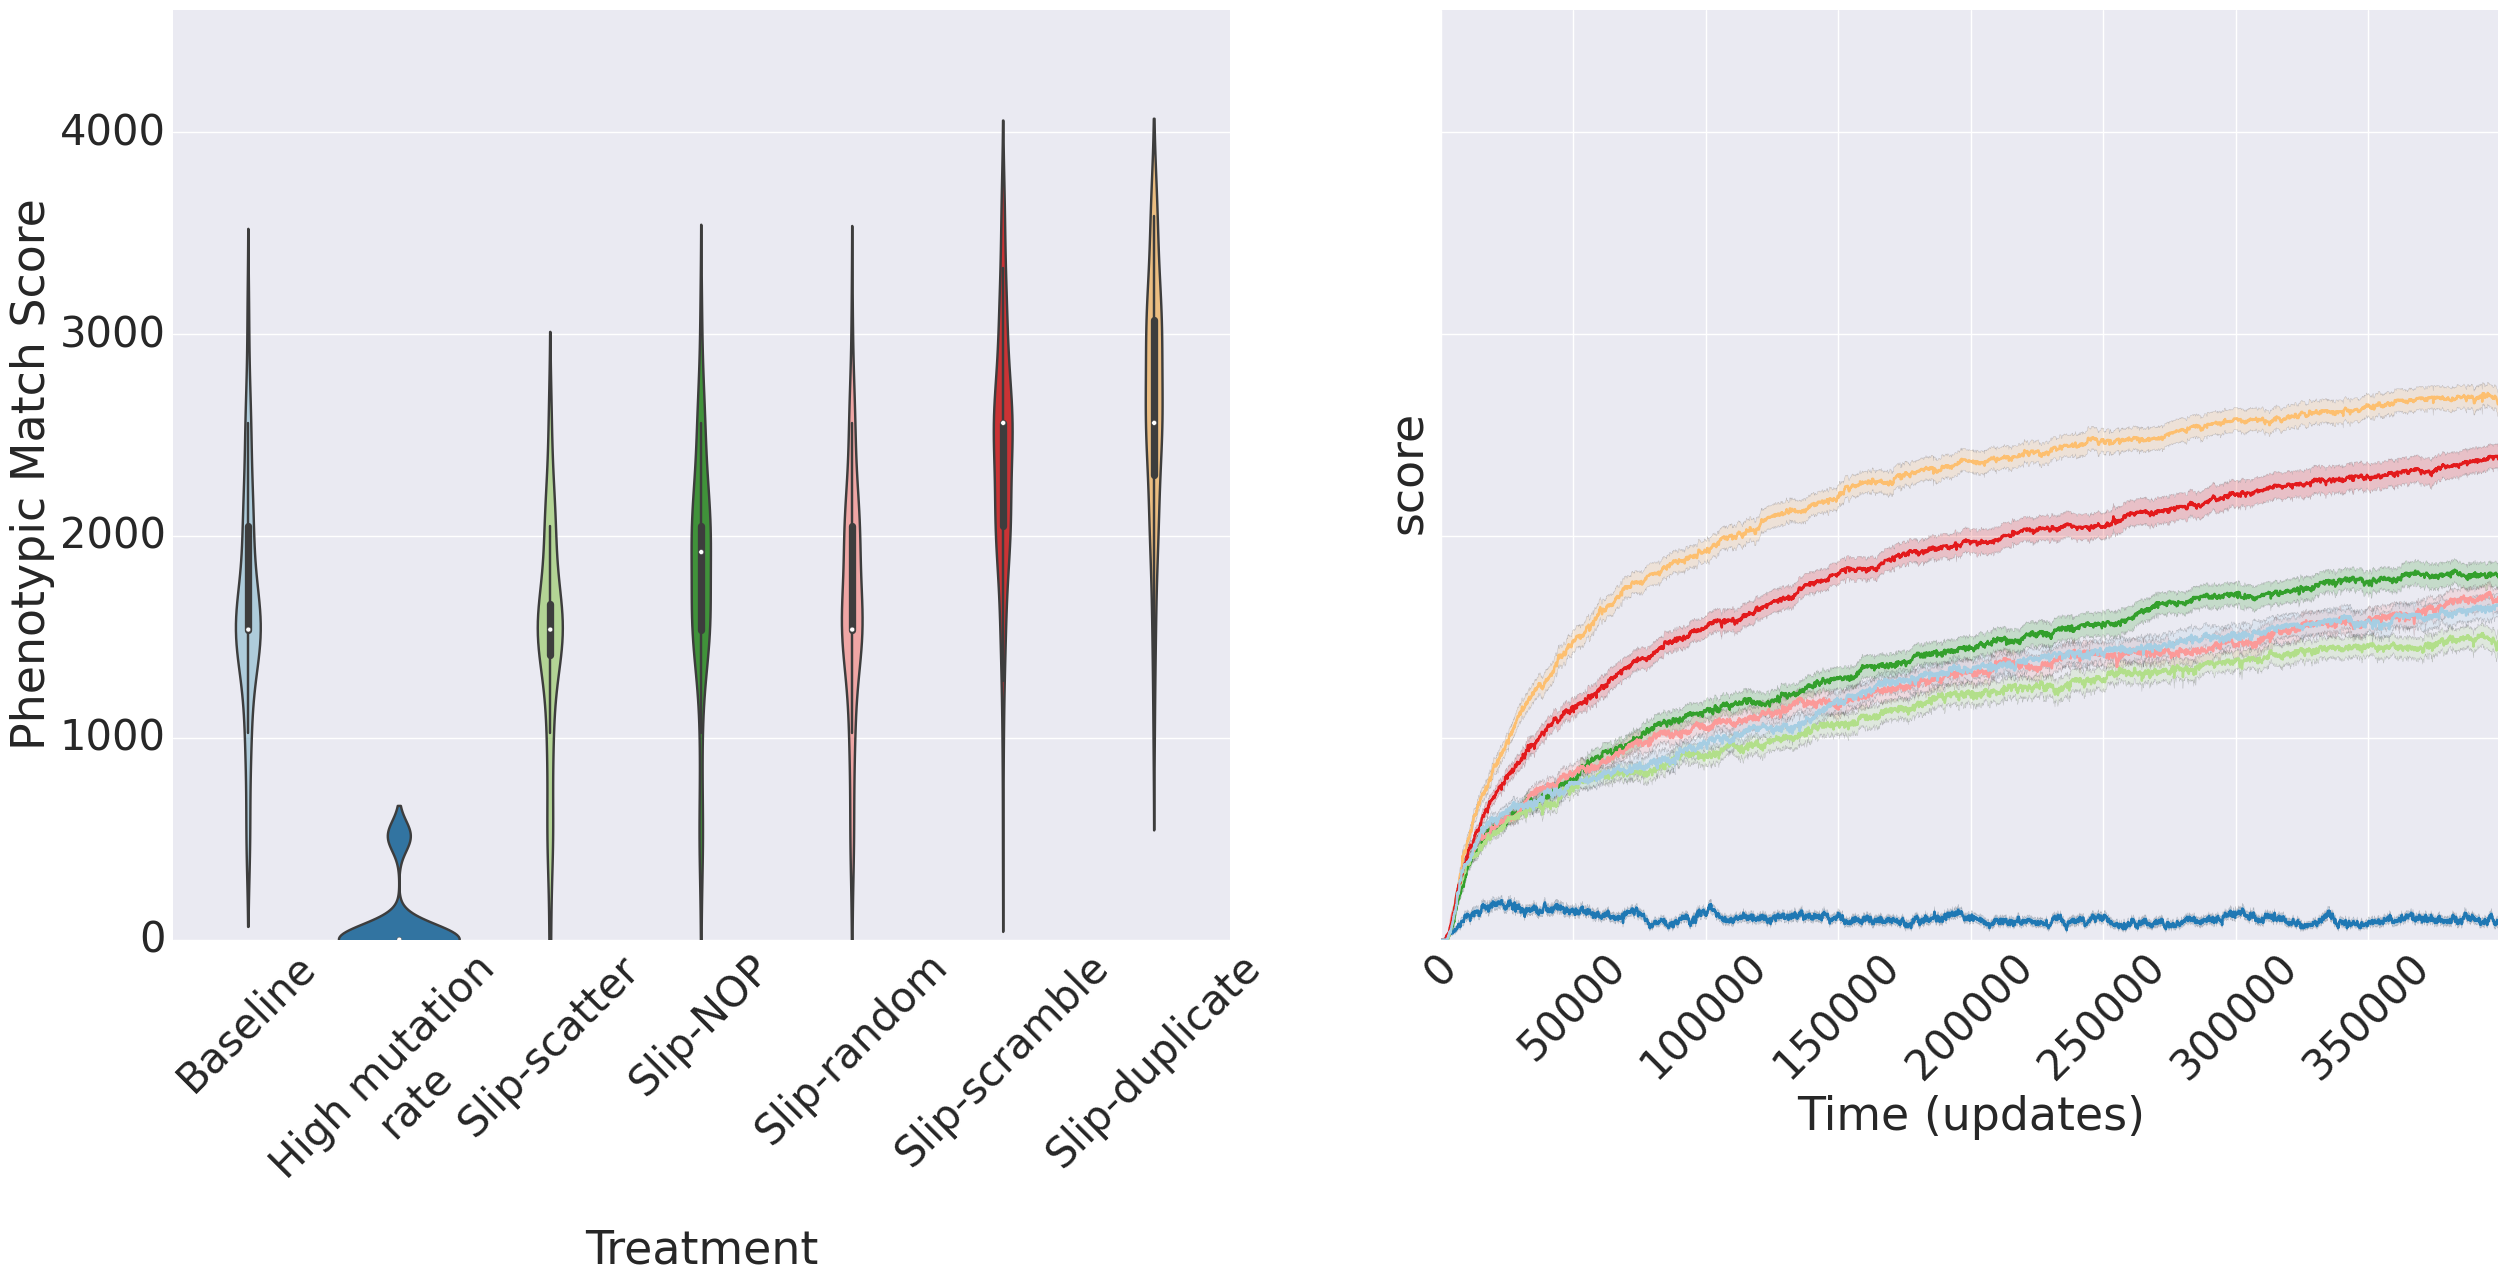

In [121]:
# plot score over time
sns.set(font_scale = 3)

fig, axarr = plt.subplots(1, 2, sharey = True)
fig.set_size_inches(30, 12)

#axarr[0].set_title("Static Environment")


ploty2 = sns.violinplot(x = "fancy_name", y = "-1000_phenotype_score", data = df_mg100[df_mg100["question"] == "Q3"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = axarr[0])
axarr[0].set_ylabel("Phenotypic Match Score")
axarr[0].set_xticklabels(nasty_labels, rotation = 45)
axarr[0].set_xlabel("Treatment")
axarr[0].set_ylim(0, 4608)

ploty = sns.tsplot(data=q3mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = axarr[1], legend = False)
axarr[1].set_xlabel("Time (updates)")
axarr[1].set_ylim(0, 4608)
axarr[1].set_xlim(0, 399000)
axarr[1].set_xticklabels([i for i in range(0, 399001, 50000)], rotation = 45)
fig.subplots_adjust(hspace=.3)
fig.savefig("complex-changing-env__min-gen-100_horizontal.png", bbox_inches='tight')

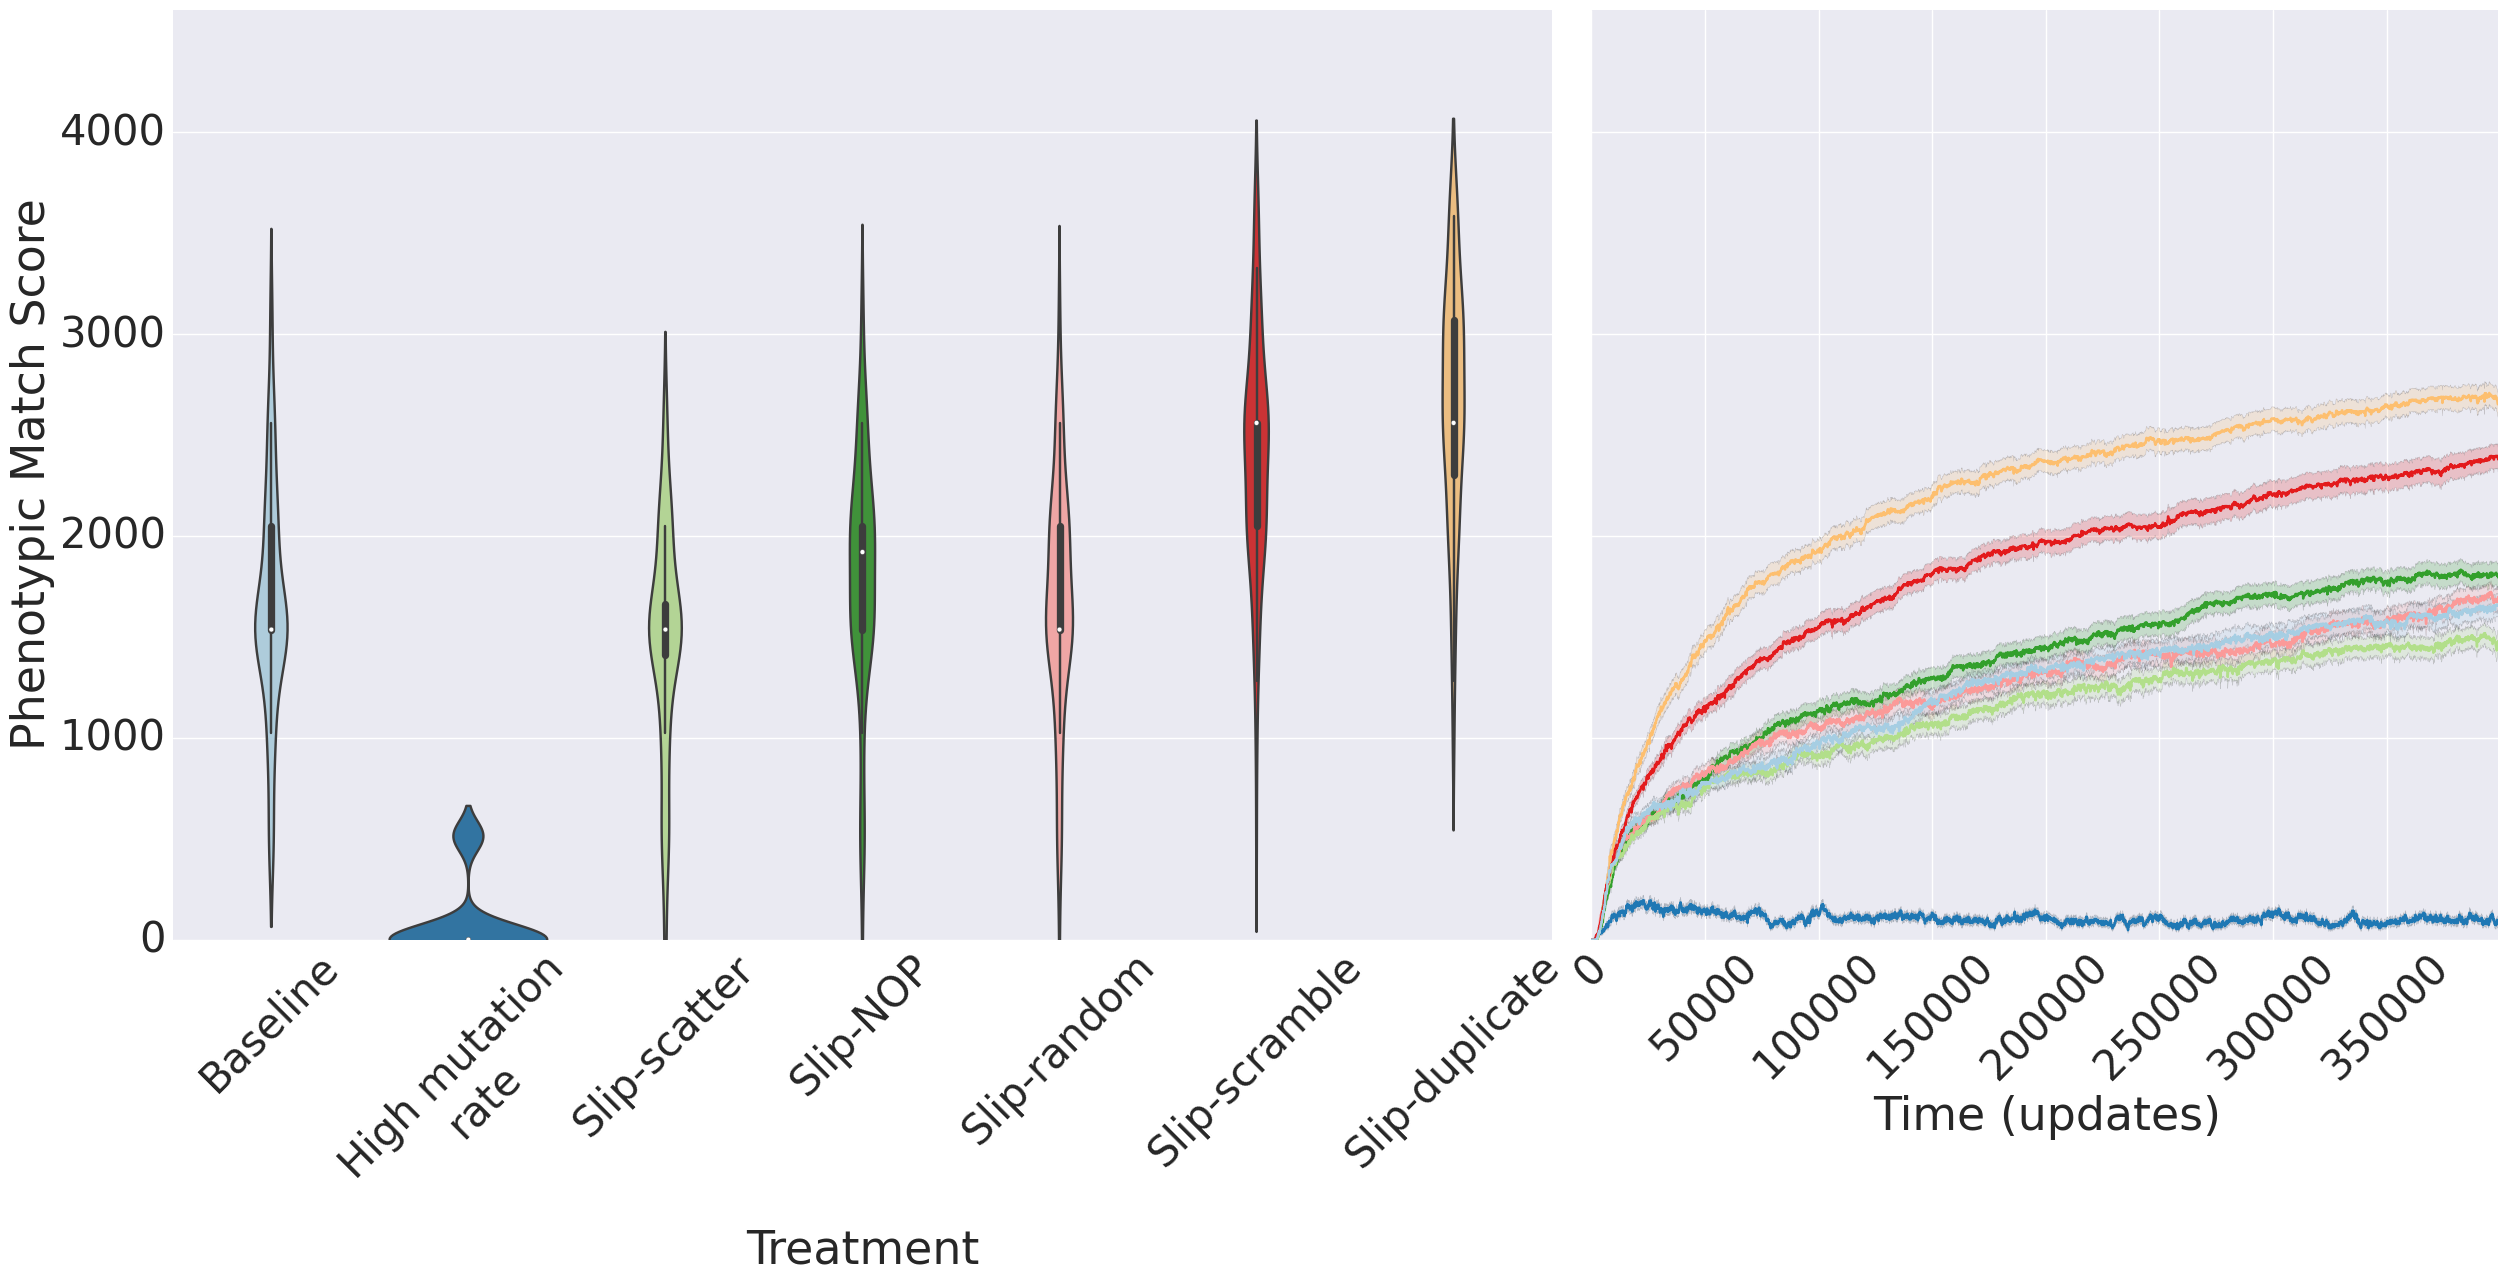

In [137]:
# plot score over time
sns.set(font_scale = 3)

fig = plt.figure(1)
gridspec.GridSpec(1, 10)

fig.set_size_inches(30, 12)

ax0 = plt.subplot2grid((1, 10), (0, 0), colspan = 6)
ploty2 = sns.violinplot(x = "fancy_name", y = "-1000_phenotype_score", data = df_mg100[df_mg100["question"] == "Q3"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = ax0)
ax0.set_ylabel("Phenotypic Match Score")
ax0.set_xticklabels(nasty_labels, rotation = 45)
ax0.set_xlabel("Treatment")
ax0.set_ylim(0, 4608)

ax1 = plt.subplot2grid((1, 10), (0, 6), colspan = 4, sharey=ax0)
ploty = sns.tsplot(data=q3mg100ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = ax1, legend = False)
ax1.set_xlabel("Time (updates)")
ax1.set_ylim(0, 4608)
ax1.set_xlim(0, 399000)
ax1.set_xticklabels([i for i in range(0, 399000, 50000)], rotation = 45)
ax1.set_ylabel("")
plt.setp(ax1.get_yticklabels(), visible = False)
fig.subplots_adjust(hspace=.3)
fig.savefig("complex-changing-env__min-gen-100_horizontal.png", bbox_inches='tight')

# Slip-duplicate vs Slip-scramble

In [93]:
data_fpath = os.path.join(exp_base_dir, "extra_data_processed", "SlipMutations_FinalDoms__DUPvSCRAM.csv")
ts_fpath = os.path.join(exp_base_dir, "extra_data_processed", "extra_runs__lineage_score_ts__FANCY.csv")

In [94]:
# Load data
df__extra = pd.read_csv(data_fpath)
ts_df__extra = pd.read_csv(ts_fpath)

In [95]:
q1ts_df__extra = ts_df__extra[ts_df__extra["question"] == "Q1"]
q2ts_df__extra = ts_df__extra[ts_df__extra["question"] == "Q2"]
q3ts_df__extra = ts_df__extra[ts_df__extra["question"] == "Q3"]


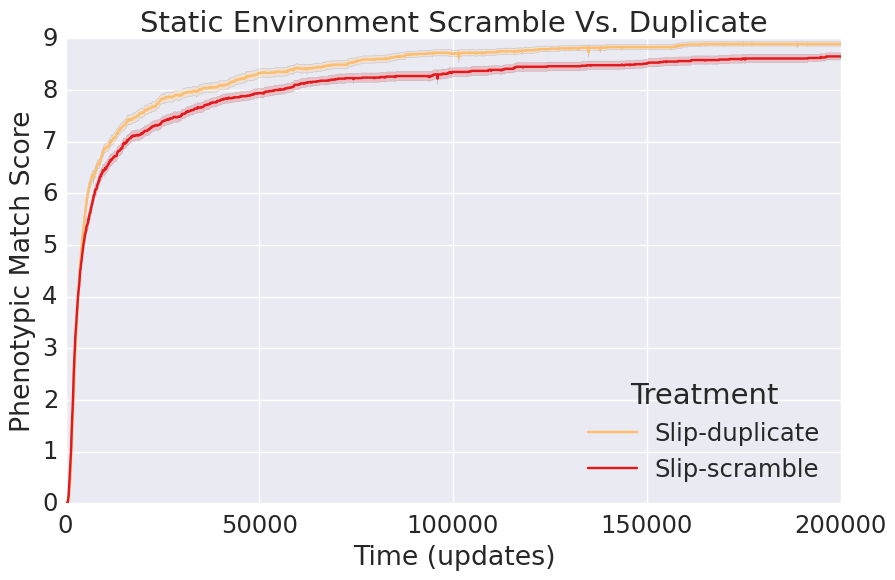

In [96]:
# plot score over time
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ploty = sns.tsplot(data=q1ts_df__extra, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap)
ax.set_ylabel("Phenotypic Match Score")
ax.set_xlabel("Time (updates)")
ax.set_title("Static Environment Scramble Vs. Duplicate")
ax.set_ylim(0, 9)
ax.set_xlim(0, 200000)
ax.legend(title= 'Treatment', loc = 'lower right')
#ploty.get_figure().savefig("static-env_min-gen-100__lineage.png", bbox_inches='tight')

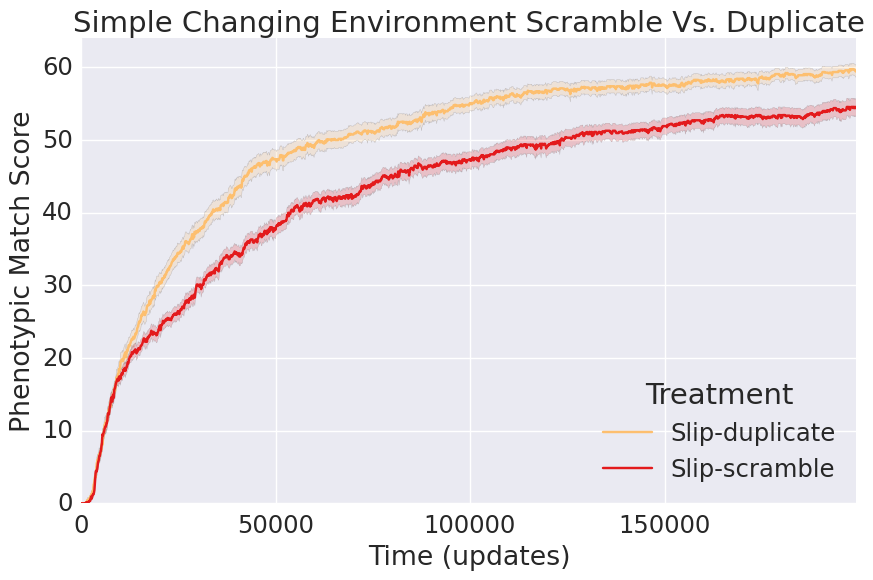

In [97]:
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ploty = sns.tsplot(data=q2ts_df__extra, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap)
ax.set_ylabel("Phenotypic Match Score")
ax.set_xlabel("Time (updates)")
ax.set_title("Simple Changing Environment Scramble Vs. Duplicate")
ax.set_ylim(0, 64)
ax.set_xlim(0, 199000)
ax.legend(title= 'Treatment', loc = 'lower right')

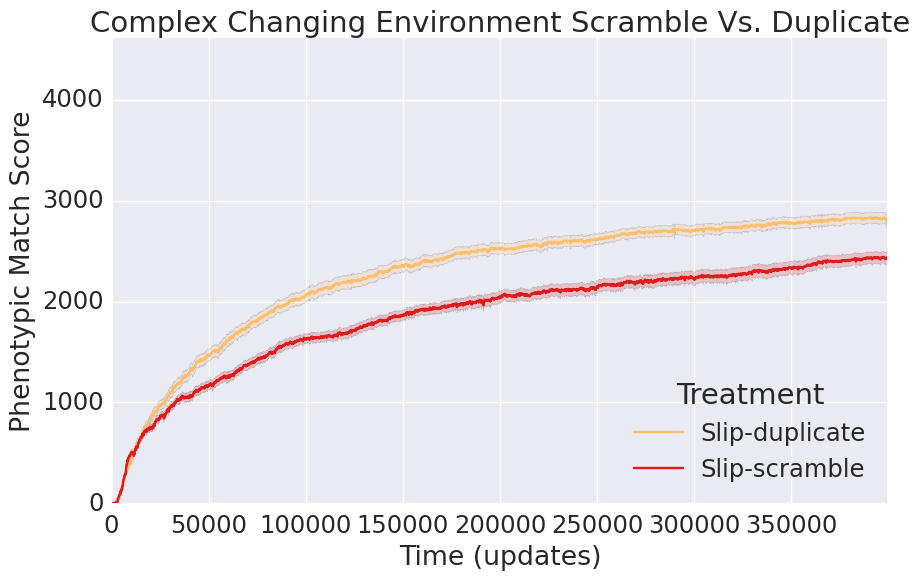

In [99]:
sns.set(font_scale = 1.75)
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ploty = sns.tsplot(data=q3ts_df__extra, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap)
ax.set_ylabel("Phenotypic Match Score")
ax.set_xlabel("Time (updates)")
ax.set_title("Complex Changing Environment Scramble Vs. Duplicate")
ax.set_ylim(0, 4608)
ax.set_xlim(0, 399000)
ax.legend(title= 'Treatment', loc = 'lower right')

# No Minimum Genome Size

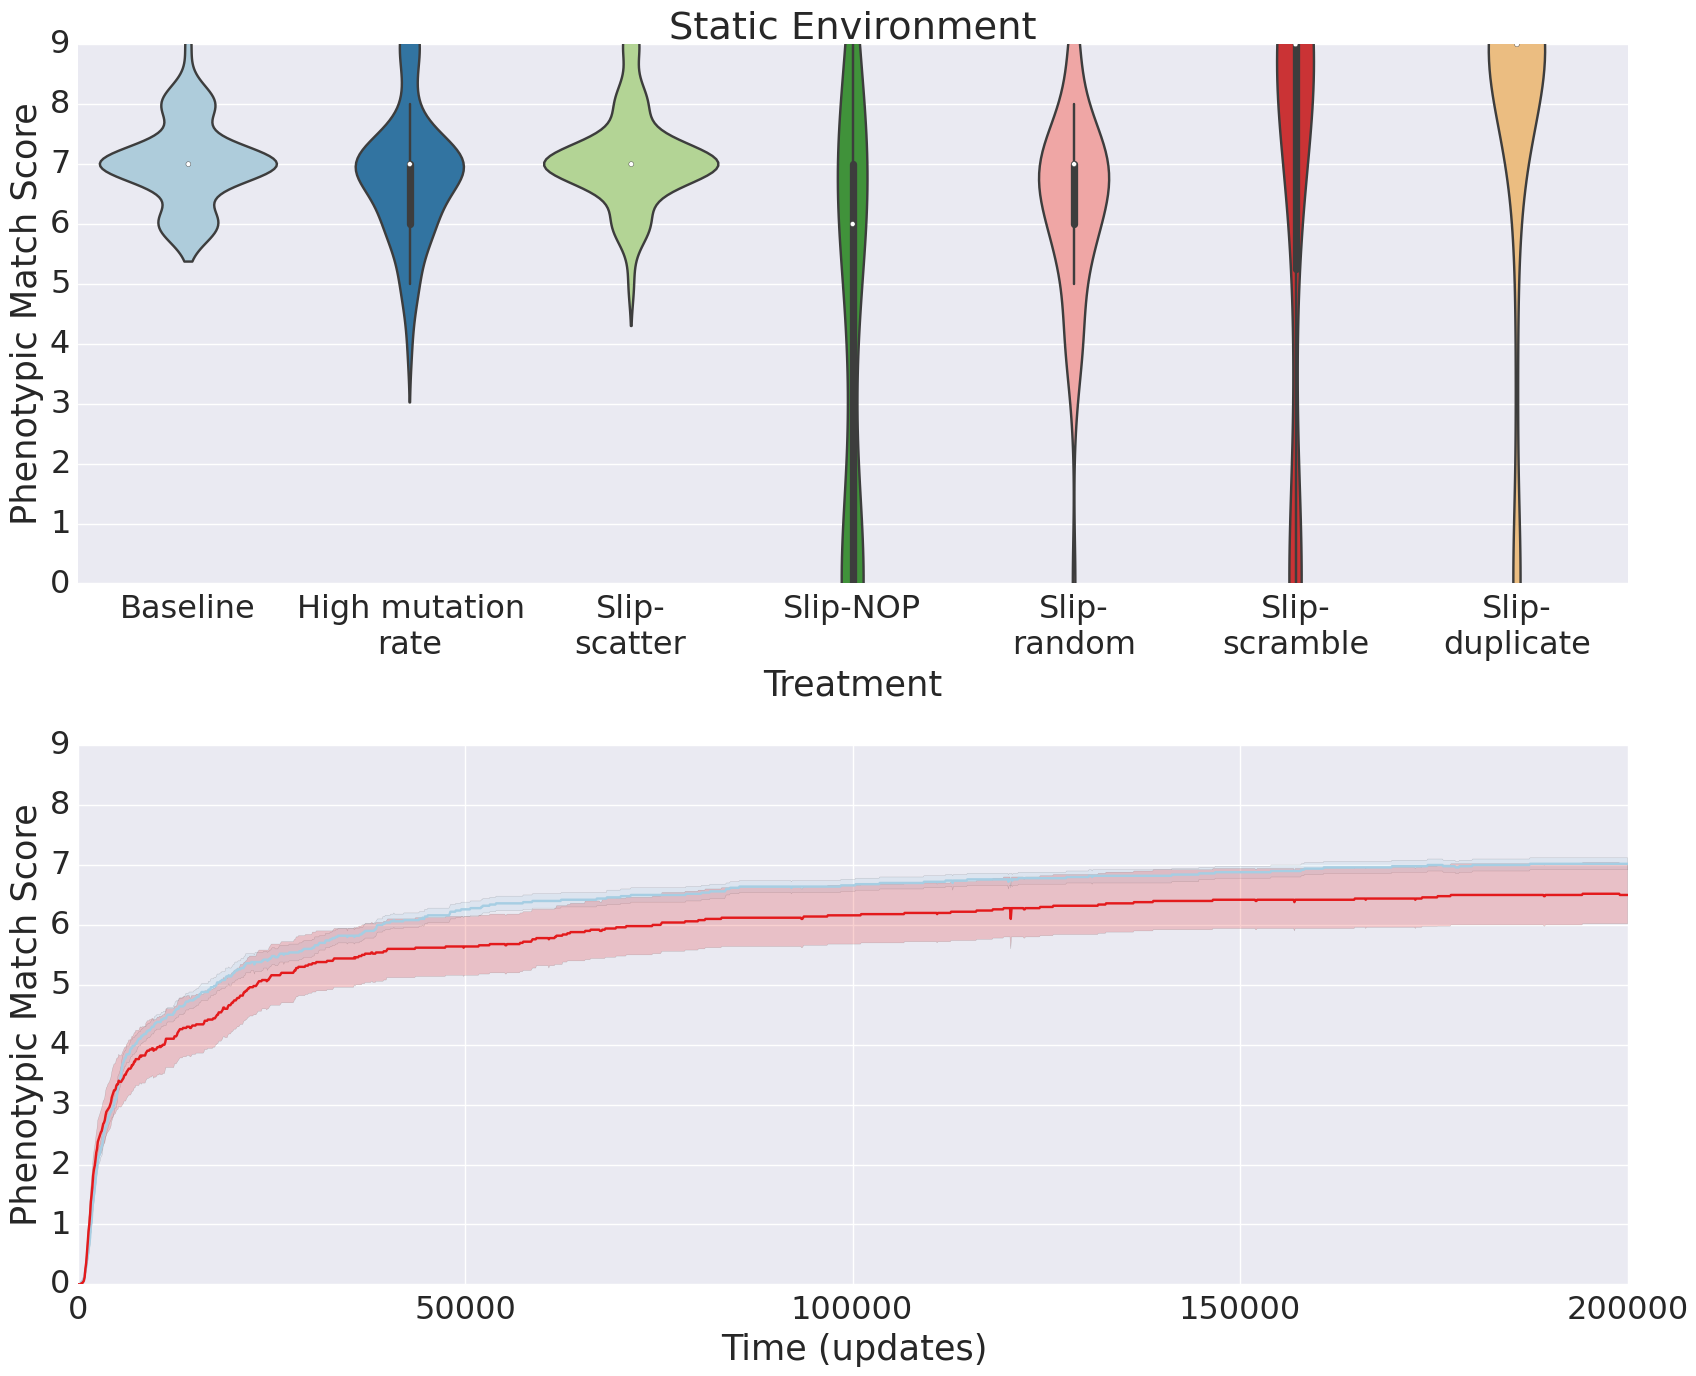

In [103]:
sns.set(font_scale = 2.3)

fig, axarr = plt.subplots(2)
fig.set_size_inches(20, 16)

axarr[0].set_title("Static Environment")


ploty2 = sns.violinplot(x = "fancy_name", y = "fdom_phenotype_score", data = df_mg0[df_mg0["question"] == "Q1"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = axarr[0])
axarr[0].set_ylabel("Phenotypic Match Score")
axarr[0].set_xticklabels(nasty_labels)
axarr[0].set_xlabel("Treatment")
axarr[0].set_ylim(0, 9)
hellodata = q1mg0ts_df[(q1mg0ts_df["fancy_name"] == "Baseline") | (q1mg0ts_df["fancy_name"] == "Slip-scramble")]
ploty = sns.tsplot(data=hellodata, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = axarr[1], legend = False)
axarr[1].set_ylabel("Phenotypic Match Score")
axarr[1].set_xlabel("Time (updates)")
axarr[1].set_ylim(0, 9)
axarr[1].set_xlim(0, 200000)
#axarr[1].legend(title= 'Treatment', loc = 'lower right')
#axarr[1].legend_.remove()
fig.subplots_adjust(hspace=.3)
fig.savefig("static-env__min-gen-0.png", bbox_inches='tight')

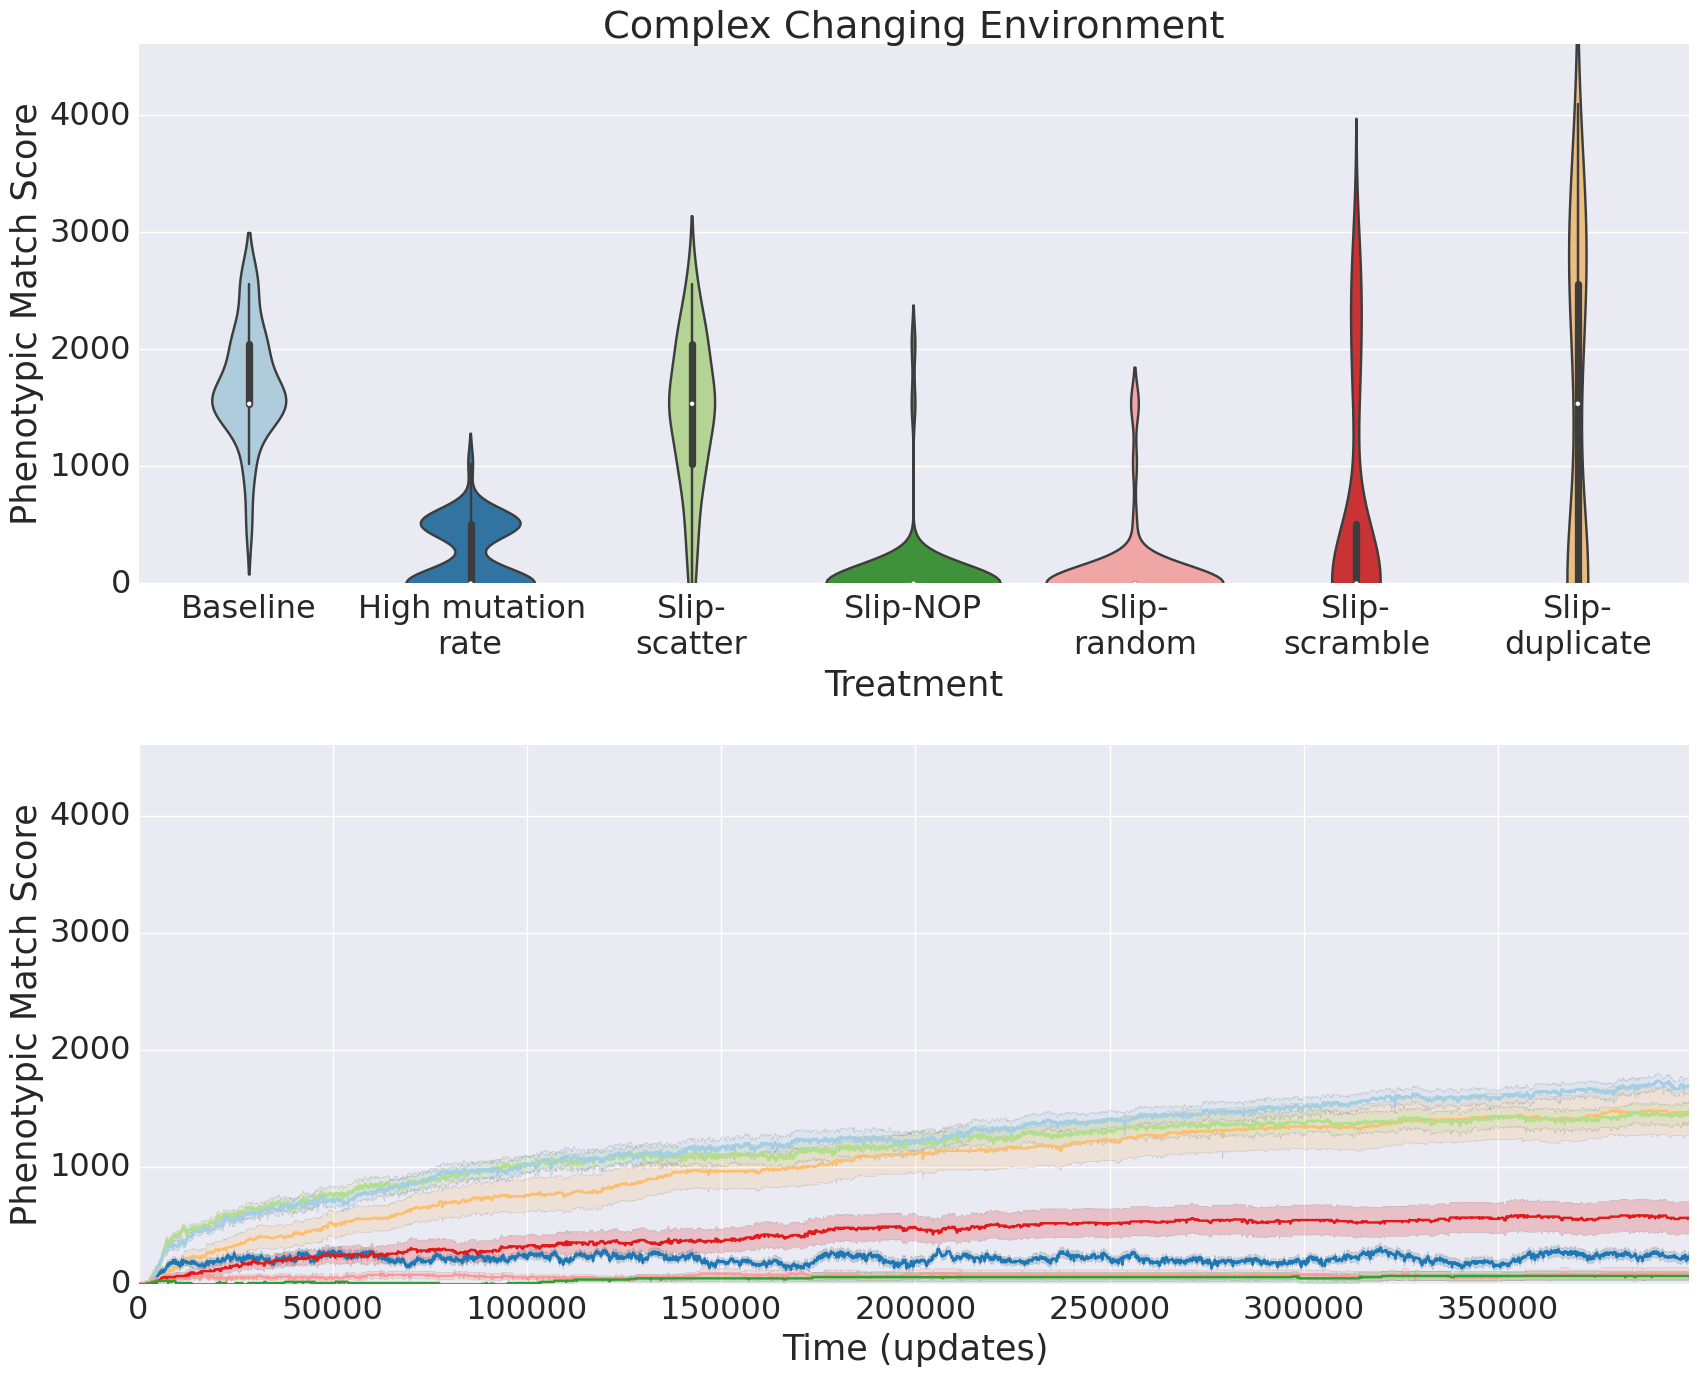

In [104]:
sns.set(font_scale = 2.3)

fig, axarr = plt.subplots(2)
fig.set_size_inches(20, 16)

axarr[0].set_title("Complex Changing Environment")


ploty2 = sns.violinplot(x = "fancy_name", y = "-1000_phenotype_score", data = df_mg0[df_mg0["question"] == "Q3"], 
               order = fancy_order, palette =fancy_cmap, orient = "v", ax = axarr[0])
axarr[0].set_ylabel("Phenotypic Match Score")
axarr[0].set_xticklabels(nasty_labels)
axarr[0].set_xlabel("Treatment")
axarr[0].set_ylim(0, 4608)

ploty = sns.tsplot(data=q3mg0ts_df, time="update", unit="rep",
           condition="fancy_name", value="score", color=fancy_cmap, ax = axarr[1], legend = False)
axarr[1].set_ylabel("Phenotypic Match Score")
axarr[1].set_xlabel("Time (updates)")
axarr[1].set_ylim(0, 4608)
axarr[1].set_xlim(0, 399000)
#axarr[1].legend(title= 'Treatment', loc = 'lower right')

fig.subplots_adjust(hspace=.3)
fig.savefig("complex-changing-env__min-gen-0.png", bbox_inches='tight')